This notebook was tested with Google Colab

# Init Pyspark and Install Libraries

In [ ]:
JAVA_HOME = "/usr/lib/jvm/java-8-openjdk-amd64" # Set path to JAVA_HOME

In [ ]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            25G        524M         22G        1.1M        2.1G         24G
Swap:            0B          0B          0B


In [ ]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = JAVA_HOME

     |████████████████████████████████| 212.4 MB 29 kB/s 
     |████████████████████████████████| 198 kB 65.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=89d9688abf25d2805b8a92874b55135e0894956191fae2cb284de9bbf9d39482
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 40 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 143 MB of additional disk space will be used.
Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Rea

In [ ]:
import pyspark
from pyspark.sql import *
from pyspark.sql.types import * 
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf
from pyspark.sql import functions as F

import numpy as np
import pandas as pd

import gc
import builtins

import requests
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

RANDOM_SEED = 128

In [ ]:
# Create the session
conf = SparkConf().set("spark.ui.port", "4050") \
  .set('spark.executor.memory', '25G') \
  .set('spark.driver.memory', '45G') \
  .set('spark.shuffle.service.enabled', 'true') \
  .set('spark.driver.maxResultSize', '15G') \
  .set("spark.dynamicAllocation.enabled", "true") \
  .set("spark.dynamicAllocation.minExecutors", "5") \
  .set("spark.dynamicAllocation.maxExecutors", "30") \
  .set("spark.dynamicAllocation.initialExecutors", "10") \
  .set("spark.scheduler.mode", "FAIR") \
  .set("spark.executor.cores", 8) \
  .set("spark.serializer", "org.apache.spark.serializer.KryoSerializer") \
  .set("spark.shuffle.compress", "true") \
  .set("spark.io.compression.codec", "snappy") \
  .set("spark.speculation", "false")

# Create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [ ]:
spark

In [ ]:
sc._conf.getAll()

[('spark.driver.host', 'e73c5146d2ee'),
 ('spark.dynamicAllocation.minExecutors', '5'),
 ('spark.serializer', 'org.apache.spark.serializer.KryoSerializer'),
 ('spark.dynamicAllocation.maxExecutors', '30'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.master', 'local[*]'),
 ('spark.submit.deployMode', 'client'),
 ('spark.executor.cores', '8'),
 ('spark.driver.port', '39219'),
 ('spark.io.compression.codec', 'snappy'),
 ('spark.shuffle.service.enabled', 'true'),
 ('spark.app.startTime', '1631305027080'),
 ('spark.executor.memory', '25G'),
 ('spark.driver.memory', '45G'),
 ('spark.shuffle.compress', 'true'),
 ('spark.driver.maxResultSize', '15G'),
 ('spark.scheduler.mode', 'FAIR'),
 ('spark.sql.warehouse.dir', 'file:/content/spark-warehouse'),
 ('spark.executor.id', 'driver'),
 ('spark.app.name', 'pyspark-shell'),
 ('spark.ui.port', '4050'),
 ('spark.rdd.compress', 'True'),
 ('spark.speculation', 'false'),
 ('spark.app.id', 'local-1631305027867'),
 ('spark.submit.pyFiles', '')

In [ ]:
!pip install requests 

# Dataset download

In [ ]:
!gdown --id 1UHq8px8F0ch7jbmWBdUkuBWqao3eCH3G
!gdown --id 1U5feXWDI2CihYz4ov8LyXLnUCvCsR-J7

Downloading...
From: https://drive.google.com/uc?id=1UHq8px8F0ch7jbmWBdUkuBWqao3eCH3G
To: /content/spotify-artists.zip
426MB [00:01, 279MB/s]
Downloading...
From: https://drive.google.com/uc?id=1U5feXWDI2CihYz4ov8LyXLnUCvCsR-J7
To: /content/spotify-dataset.zip
202MB [00:00, 263MB/s]


In [ ]:
!ls 

sample_data  spotify-artists.zip  spotify-dataset.zip


In [ ]:
!mkdir datasets

In [ ]:
!unzip spotify-artists.zip -d datasets/
!unzip spotify-dataset.zip -d datasets/

Archive:  spotify-artists.zip
   creating: datasets/spotify-artists/
  inflating: datasets/spotify-artists/BI.csv  
  inflating: datasets/spotify-artists/CA.csv  
  inflating: datasets/spotify-artists/CH.csv  
  inflating: datasets/spotify-artists/CL.csv  
  inflating: datasets/spotify-artists/CM.csv  
  inflating: datasets/spotify-artists/CO.csv  
  inflating: datasets/spotify-artists/CR.csv  
  inflating: datasets/spotify-artists/CY.csv  
  inflating: datasets/spotify-artists/CZ.csv  
  inflating: datasets/spotify-artists/DE.csv  
  inflating: datasets/spotify-artists/DJ.csv  
  inflating: datasets/spotify-artists/DK.csv  
  inflating: datasets/spotify-artists/DM.csv  
  inflating: datasets/spotify-artists/DO.csv  
  inflating: datasets/spotify-artists/EC.csv  
  inflating: datasets/spotify-artists/EE.csv  
  inflating: datasets/spotify-artists/EG.csv  
  inflating: datasets/spotify-artists/ES.csv  
  inflating: datasets/spotify-artists/FI.csv  
  inflating: datasets/spotify-artists/

# Initialize Datasets


In [ ]:
import json

tracks_schema = json.loads('''{   
    "type": "struct",
    "fields": [
        {
            "name": "id",
            "type": "string",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "name",
            "type": "string",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "popularity",
            "type": "double",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "duration_ms",
            "type": "double",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "explicit",
            "type": "string",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "artists",
            "type": "string",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "id_artists",
            "type": "string",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "release_date",
            "type": "string",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "danceability",
            "type": "double",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "energy",
            "type": "double",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "key",
            "type": "integer",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "loudness",
            "type": "double",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "mode",
            "type": "integer",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "speechiness",
            "type": "double",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "acousticness",
            "type": "double",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "instrumentalness",
            "type": "double",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "liveness",
            "type": "double",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "valence",
            "type": "double",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "tempo",
            "type": "double",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "time_signature",
            "type": "integer",
            "nullable": true,
            "metadata": {}
        }
    ]
}''')


artists_schema = json.loads('''{
    "type": "struct",
    "fields": [
        {
            "name": "id",
            "type": "string",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "followers",
            "type": "string",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "genres",
            "type": "string",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "name",
            "type": "string",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "popularity",
            "type": "string",
            "nullable": true,
            "metadata": {}
        }
    ]
}''')


genres_schema = json.loads('''{
    "type": "struct",
    "fields": [
        {
            "name": "mode",
            "type": "integer",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "genres",
            "type": "string",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "acousticness",
            "type": "double",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "danceability",
            "type": "double",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "duration_ms",
            "type": "double",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "energy",
            "type": "double",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "instrumentalness",
            "type": "double",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "liveness",
            "type": "double",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "loudness",
            "type": "double",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "speechiness",
            "type": "double",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "tempo",
            "type": "double",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "valence",
            "type": "double",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "popularity",
            "type": "double",
            "nullable": true,
            "metadata": {}
        },
        {
            "name": "key",
            "type": "integer",
            "nullable": true,
            "metadata": {}
        }
    ]
}''')

In [ ]:
def init_dataset(tracks_json, artists_json, genres_json, ):

  from pyspark.sql.types import StructType
  import json

  tracks_schema = StructType.fromJson(tracks_json)
  artists_schema = StructType.fromJson(artists_json)
  genres_schema = StructType.fromJson(genres_json)


  # Load tracks
  tracks_df = spark.read.schema(tracks_schema).load("datasets/spotify-dataset/tracks.csv", 
                           format="csv", 
                           sep=",", 
                           header="true")

  tracks_df = tracks_df.dropDuplicates(["id"]).persist();
  tracks_df.show(5, False)      


  # Load artists
  artists_df = spark.read.schema(artists_schema).load('datasets/spotify-artists/*.csv', 
                           format="csv", 
                           sep=",", 
                           header="true")

  _ = spark.read.schema(artists_schema).load("datasets/spotify-dataset/artists.csv", 
                           format="csv", 
                           sep=",", 
                           header="true")
  
  artists_df = artists_df.drop("year").union(_).filter("genres != '[]'").dropDuplicates(["id"]).persist();
  artists_df.show(5, False)      


  # Load genres
  genres_df = spark.read.schema(genres_schema).load("datasets/spotify-dataset/data_by_genres_o.csv", 
                           format="csv", 
                           sep=",", 
                           header="true").where("genres != '[]'").where("genres != ''").persist()

  genres_df.show(5, False) 

  return tracks_df, artists_df, genres_df

# Data Preprocessing

### Load dataset

In [ ]:
tracks_df, artists_df, genres_df = init_dataset(tracks_schema, artists_schema, genres_schema)

+----------------------+---------------------------------------------------------------------+----------+-----------+--------+--------------------------------------------------+------------------------------------------------------------------------------+------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+
|id                    |name                                                                 |popularity|duration_ms|explicit|artists                                           |id_artists                                                                    |release_date|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|tempo  |time_signature|
+----------------------+---------------------------------------------------------------------+----------+-----------+--------+--------------------------------------------------+-------------------------------------------

In [ ]:
tracks_df.count()

586672

### Load geographical words

The following is a list of countries and nationality. I will use it to build a regular expression in order to filter out these words from the genres terms.

In [ ]:
!wget https://raw.githubusercontent.com/Dinuks/country-nationality-list/master/countries.csv -P '/content/gdrive/My Drive/bdc-2020-21/kaggle/countries/'

--2021-09-10 20:18:50--  https://raw.githubusercontent.com/Dinuks/country-nationality-list/master/countries.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9312 (9.1K) [text/plain]
Saving to: ‘/content/gdrive/My Drive/bdc-2020-21/kaggle/countries/countries.csv’

countries.csv       100%[===================>]   9.09K  --.-KB/s    in 0s      

2021-09-10 20:18:50 (116 MB/s) - ‘/content/gdrive/My Drive/bdc-2020-21/kaggle/countries/countries.csv’ saved [9312/9312]



In [ ]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover

def load_countries():
    print("Loading countries")
    countries_df = spark.read.load("/content/gdrive/My Drive/bdc-2020-21/kaggle/countries/countries.csv", 
                            format="csv", 
                            sep=",", 
                            inferSchema="true", 
                      header="true")
    print("Transforming df")
    countries_edit_df = countries_df.select(lower("en_short_name"), lower("nationality")).withColumnRenamed("lower(nationality)","nationality").withColumnRenamed("lower(en_short_name)","country").cache()
    print("Creating words")
    countries_words_df = countries_edit_df.select("nationality").union(countries_edit_df.select("country")  )

    return countries_words_df

def get_countries_regex(countries_df):
    from nltk.stem.snowball import SnowballStemmer

    column_name = "nationality"

    # 1. Text cleaning
    print("# 1. Text Cleaning\n")
    # 1.a Case normalization
    print("1.a Case normalization:")
    countries_lowercase_df = countries_df.select(lower(col(column_name)).alias(column_name))
    countries_lowercase_df.show(10)
    # 1.b Trimming
    print("1.b Trimming:")
    countries_trimmed_df = countries_lowercase_df.select(trim(col(column_name)).alias(column_name))
    countries_trimmed_df.show(10)
    # 1.c Filter out punctuation symbols
    print("1.c Filter out punctuation:")
    countries_no_punct_df = countries_trimmed_df.select((regexp_replace(col(column_name), "[^a-zA-Z\\s]", "")).alias(column_name))
    countries_no_punct_df.show(10)
    # 1.d Filter out any internal extra whitespace
    print("1.d Filter out extra whitespaces:")
    countries_space_filter_df = countries_no_punct_df.select(trim(regexp_replace(col(column_name), " +", " ")).alias(column_name))
    countries_space_filter_df.show(10)

    # 2. Tokenization (split text into tokens)
    print("# 2. Tokenization:")
    tokenizer = Tokenizer(inputCol=column_name, outputCol="tokens")
    tokens_df = tokenizer.transform(countries_space_filter_df).cache()
    tokens_df.show(10)


    # 3. Stopwords removal
    print("# 3. Stopwords removal:")
    stopwords_remover = StopWordsRemover(inputCol="tokens", outputCol="terms")
    terms_df = stopwords_remover.transform(tokens_df).cache()
    terms_df.show(10)

    # 4. Stemming (Snowball stemmer)
    print("# 4. Stemming:")
    stemmer = SnowballStemmer(language="english")
    stemmer_udf = udf(lambda tokens: [stemmer.stem(token) for token in tokens], ArrayType(StringType()))
    terms_stemmed_df = terms_df.withColumn("terms_stemmed", stemmer_udf("terms")).cache()
    terms_stemmed_df.show(10)

    # 5. Build the regular expression
    print("# 5. Building the regular expression:")
    regex = ""

    strings_arr = terms_stemmed_df.collect()

    print(strings_arr)

    strings = []
    for elem in strings_arr:
        for item in elem["terms_stemmed"]:
            strings.append(item)
    print(strings)

    for i, word in enumerate(strings):
        regex += "\\b("+word+")"
        if i < len(strings):
          regex += "|"

    print("\n\n### Final Regex ### \n")
    print(regex)

    return regex

In [ ]:
countries_words_df = load_countries()
filter_word_regex = get_countries_regex(countries_words_df)

Loading countries
Transforming df
Creating words
# 1. Text Cleaning

1.a Case normalization:
+--------------------+
|         nationality|
+--------------------+
|              afghan|
|        åland island|
|            albanian|
|            algerian|
|     american samoan|
|            andorran|
|             angolan|
|           anguillan|
|           antarctic|
|antiguan or barbudan|
+--------------------+
only showing top 10 rows

1.b Trimming:
+--------------------+
|         nationality|
+--------------------+
|              afghan|
|        åland island|
|            albanian|
|            algerian|
|     american samoan|
|            andorran|
|             angolan|
|           anguillan|
|           antarctic|
|antiguan or barbudan|
+--------------------+
only showing top 10 rows

1.c Filter out punctuation:
+--------------------+
|         nationality|
+--------------------+
|              afghan|
|         land island|
|            albanian|
|            algerian|
|     am

### Musical features exploration and cleaning: for tracks

Example without cleaning: the instrumentalness has some records with its value not being between 0 and 1. There are also many records with null values, and many with invalid values.

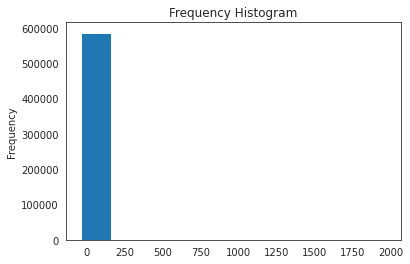

+--------------------+--------------------+----------+-----------+--------+--------------------+--------------------+------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+
|                  id|                name|popularity|duration_ms|explicit|             artists|          id_artists|release_date|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|time_signature|
+--------------------+--------------------+----------+-----------+--------+--------------------+--------------------+------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+
|007dUtG6y7FlTx9Ss...|Power of the Mind...|       0.0|  1695512.0|       0|['Orson Welles', ...|['3OMNuqaefKpUsIN...|  1938-07-03|       0.607| 0.484|  2| -12.234|   0|      0.959|        0.99|          2.7E-5|   0.384|  0.453| 69.539|            

In [ ]:
sns.set_style("white")

tracks_pdf = tracks_df.toPandas()

x = tracks_pdf["instrumentalness"]

plt.hist(x, bins=10)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

plt.show()
tracks_df.show()

They aren't a significant amount, so it is safe to just drop them

In [ ]:
tracks_without_null_df = tracks_df.where("instrumentalness is not null and danceability is not null and energy is not null and liveness is not null and loudness is not null and key is not null and speechiness is not null and valence is not null and duration_ms is not null")

In [ ]:
tracks_with_ranges_df = tracks_without_null_df \
  .filter(tracks_without_null_df.danceability.between(0, 1)) \
  .filter(tracks_without_null_df.acousticness.between(0, 1)) \
  .filter(tracks_without_null_df.energy.between(0, 1)) \
  .filter(tracks_without_null_df.instrumentalness.between(0, 1)) \
  .filter(tracks_without_null_df.speechiness.between(0, 1)) \
  .filter(tracks_without_null_df.valence.between(0, 1)) \
  .filter(tracks_without_null_df.liveness.between(0, 1)) 



In [ ]:
print("tracks with correct attributes: {} out of {}".format(tracks_with_ranges_df.count(), tracks_df.count()))

tracks with correct attributes: 583363 out of 586672


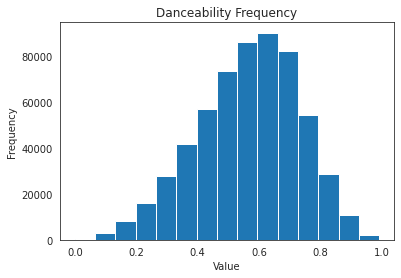

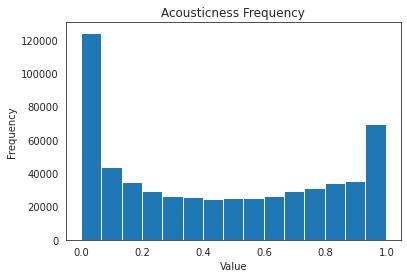

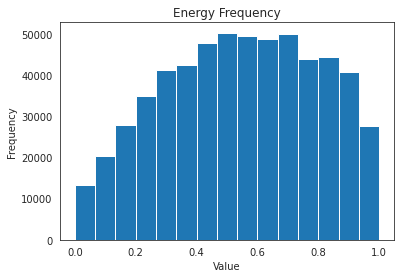

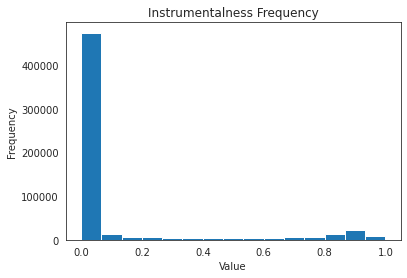

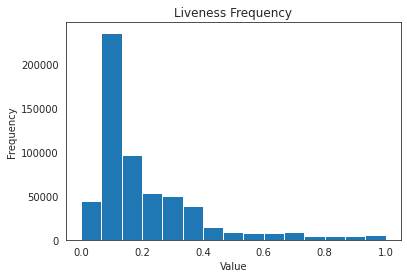

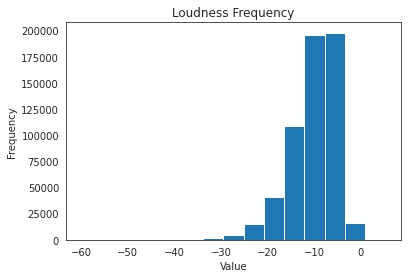

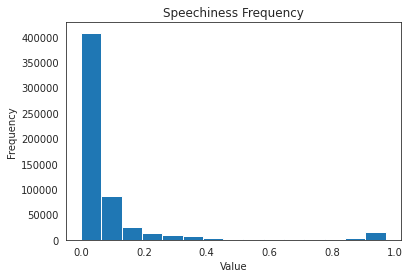

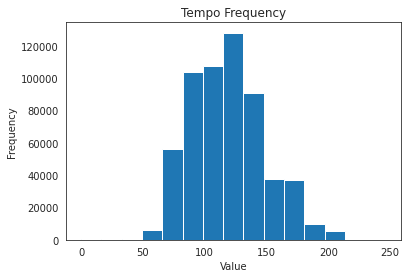

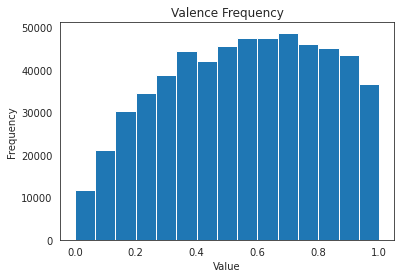

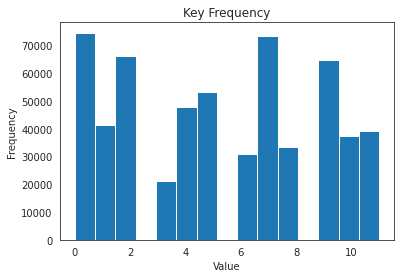

In [ ]:
sns.set_style("white")

tracks_pdf = tracks_with_ranges_df.toPandas()

for attr in ["danceability", "acousticness", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "key"]:
    plt.hist(tracks_pdf[attr], bins=15)
    plt.gca().set(title='{} Frequency'.format(attr.capitalize()), ylabel="Frequency", xlabel="Value")
    plt.show()

### Musical features exploration and cleaning: for genres

Data exploration of the genres. The genres dataset is already clean.

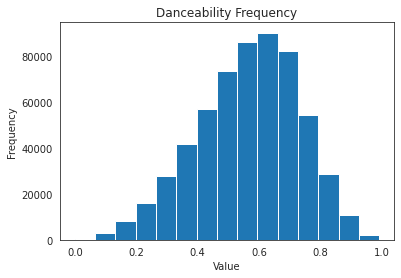

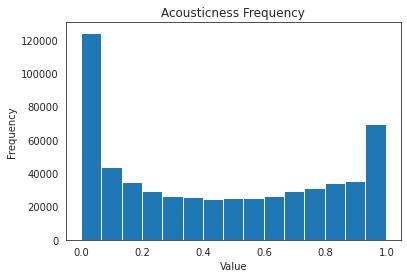

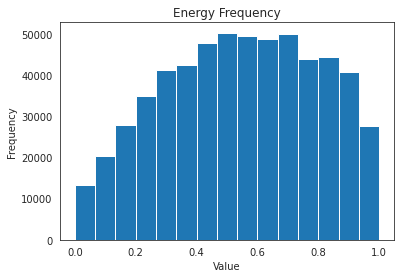

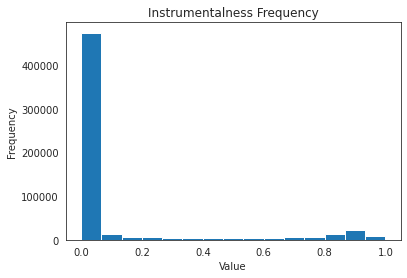

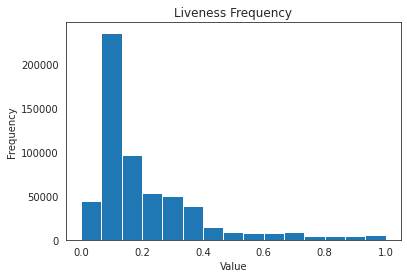

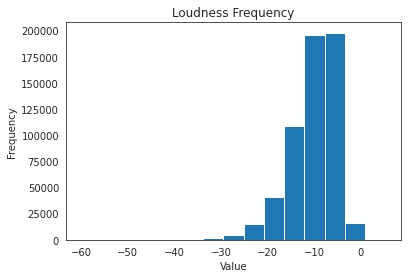

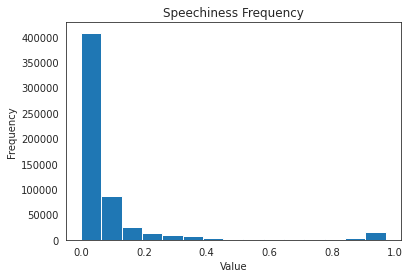

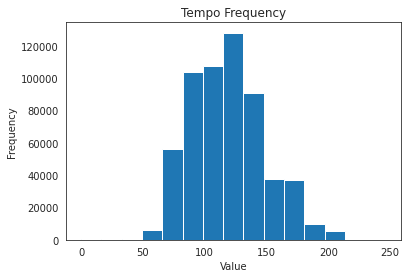

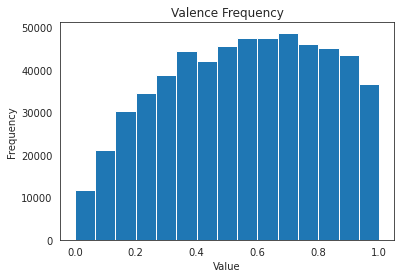

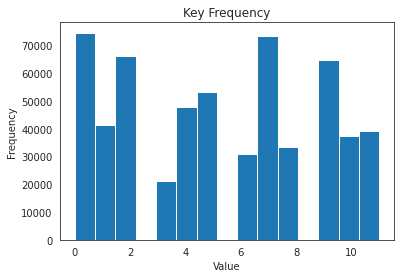

In [ ]:
sns.set_style("white")

genres_pdf = genres_df.toPandas()

for attr in ["danceability", "acousticness", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "key"]:
    plt.hist(tracks_pdf[attr], bins=15)
    plt.gca().set(title='{} Frequency'.format(attr.capitalize()), ylabel="Frequency", xlabel="Value")
    plt.show()

### Preprocess genres names

The following functions are for preprocessing the genres, in order to simplify the labels. 

After some standard preprocessing, genres are simplified by removing unnecessary information about the nationality. This is done both via nlp and via a regular expression, to filter out what the nlp library could have skipped

E.g. German folk and Irish folk are reduced to folk

In [ ]:
def filtered_words_geo(entities, word):
    for ent in entities: # Len is 1 always
      if ent.label_ != "GPE" and ent.label_ != "NORP" and ent.label_ != "LANGUAGE":
        return word
      else:
        return None
    return word

def remove_none(input_list):
    output_list = []
    for elem in input_list:
      if elem is not None and elem != "":
        output_list.append(elem)
    return output_list

In [ ]:
def preprocess_genres(genres_df, filter_regex):

    from nltk.stem.snowball import SnowballStemmer
    import nltk
    column_name = "genres"

    ### Create array of genres ###
    # 1. Text cleaning
    print("# 1. Text Cleaning\n")
    # 1.a Case normalization
    print("1.a Case normalization:")
    genres_lower_case_df = genres_df.withColumn("temp", lower(col(column_name)))
    genres_lower_case_df.cache()
    genres_lower_case_df.show(10)

    # 1.b Trimming
    print("1.b Trimming:")
    genres_trimmed_df = genres_lower_case_df.withColumn("temp", trim(col("temp")))
    genres_trimmed_df.cache()
    genres_trimmed_df.show(10)

    # 1.c Filter out punctuation symbols
    print("1.c Filter out punctuation:")
    genres_no_punct_df = genres_trimmed_df.withColumn("temp", regexp_replace(col("temp"), "[^a-zA-Z \d+]", "")) #\\s
    genres_no_punct_df.cache()
    genres_no_punct_df.show(10)

    # 1.d Filter out any internal extra whitespace
    print("1.d Filter out extra whitespaces:")
    genres_cleaned_df = genres_no_punct_df.withColumn("temp", regexp_replace(col("temp"), " +", " "))
    genres_cleaned_df.cache()
    genres_cleaned_df.show(10)

    # 2. Tokenization (split text into tokens)
    print("# 2. Tokenization:")
    tokenizer = Tokenizer(inputCol="temp", outputCol="tokens")
    tokens_df = tokenizer.transform(genres_cleaned_df)
    tokens_df.cache()
    tokens_df.show(10)

    # 3. Stopwords removal
    print("# 3. Stopwords removal:")
    stopwords_remover = StopWordsRemover(inputCol="tokens", outputCol="terms")
    terms_df = stopwords_remover.transform(tokens_df)
    terms_df.cache()
    terms_df.show(10)


    ## 4. Stemming (Snowball stemmer)
    print("# 4. Stemming:")
    stemmer = SnowballStemmer(language="english")
    stemmer_udf = udf(lambda tokens: [stemmer.stem(token) for token in tokens], ArrayType(StringType()))
    terms_stemmed_df = terms_df.withColumn("terms_stemmed", stemmer_udf("terms"))
    terms_stemmed_df.cache()
    terms_stemmed_df.show(10)

    ## 5. Remove geographical cords
    print("# 5. Remove geographical words")
    import spacy
    nlp = spacy.load("en_core_web_sm")
    geo_remover_udf = udf(lambda terms: remove_none([filtered_words_geo(nlp(term).ents, term) for term in terms]), ArrayType(StringType()))
    terms_no_geo = terms_stemmed_df.withColumn("terms_nogeo", geo_remover_udf("terms_stemmed"))
    terms_no_geo.cache()
    terms_no_geo.show(10)

    import re
    regexp_udf = udf(lambda tokens: remove_none([re.sub(filter_word_regex, "", token) for token in tokens]), ArrayType(StringType()))
    terms_no_geo_regex_df = terms_no_geo.withColumn(
            "genres_terms_preprocessed",
            regexp_udf("terms_nogeo")
        )
    terms_no_geo_regex_df.cache()
    terms_no_geo_regex_df.show(10)

    ## 6. Finalize
    print("# 6. Finalize New String")

    genres_final_df = terms_no_geo_regex_df.withColumn("genres_preprocessed", regexp_replace(terms_no_geo_regex_df.genres_terms_preprocessed.cast("string"), "[^a-zA-Z\\s]", ""))

    genres_final_df = genres_final_df.drop("tokens", 
                "temp",
                "terms", 
                "terms_clean",
                "terms_stemmed", 
                "terms_nogeo")

    genres_final_df.cache()
    genres_final_df.collect()

    genres_lower_case_df.unpersist()
    genres_trimmed_df.unpersist()
    genres_no_punct_df.unpersist()
    genres_cleaned_df.unpersist()
    tokens_df.unpersist()
    terms_df.unpersist()
    terms_stemmed_df.unpersist()
    terms_no_geo.unpersist()
    terms_no_geo_regex_df.unpersist()
    
    return genres_final_df

In [ ]:
genres_preprocessed_df = preprocess_genres(genres_df, filter_word_regex).cache()
genres_preprocessed_df.show(5, False)

# 1. Text Cleaning

1.a Case normalization:
+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+-----------------+---+--------------------+
|mode|              genres|       acousticness|       danceability|       duration_ms|             energy|    instrumentalness|           liveness|           loudness|         speechiness|             tempo|            valence|       popularity|key|                temp|
+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+-----------------+---+--------------------+
|   1|21st century clas...| 0.9793333333333332|0.16288333333333335|160297.66666666663|0.07131666666666665|          0.60683367|             0.3

In [ ]:
print("Simplified genres {} out of {}".format(genres_preprocessed_df.dropDuplicates(["genres_terms_preprocessed"]).count(),genres_preprocessed_df.count()))

Simplified genres 2113 out of 2972


# Dataset Functions

These are common function for preparing the dataset, and indexing the labels.

In [ ]:
def index_labels(dataset, inputCol="cluster", outputCol="label"):
    from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler, PCA

    label_indexer = StringIndexer(inputCol = inputCol, outputCol = outputCol).setHandleInvalid("keep")
    indexer_model = label_indexer.fit(dataset)

    return indexer_model.transform(dataset)

In [ ]:
def prepare_dataset(tracks_df, sample_percentage=0.005,random_seed=128, with_cluster=False):
  features = ["duration_ms", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]
  
  if with_cluster:
      features.append("cluster") 
      dataset_df = tracks_df.select(features).withColumnRenamed("cluster","label")
  else: 
      features.append("genres")
      features.append("genres_preprocessed")
      dataset_noindex_df = tracks_df.select(features)
      dataset_df = index_labels(dataset_noindex_df, inputCol="genres_preprocessed", outputCol="label")
      dataset_df.show(5)
  
  dataset_sample_df = dataset_df.sample(False, sample_percentage, random_seed)
  
  return dataset_sample_df

# K Means Functions

Perform a K-Means algorithm, with a PCA reduction

In [ ]:
def k_means(dataset_df,
            n_clusters, 
            features,
            pca_k,
            distance_measure="cosine", 
            max_iter=100, 
            tol=0.000001,
            prediction_col="cluster",
            random_seed=128):

    from pyspark.ml.clustering import KMeans

    print("""Training K-means clustering using the following parameters: 
    - K (n. of clusters) = {:d}
    - max_iter (max n. of iterations) = {:d}
    - distance measure = {:s}
    - random seed = {:d}
    """.format(n_clusters, max_iter, distance_measure, random_seed))

    from pyspark.ml.feature import VectorAssembler, StandardScaler, StringIndexer, PCA
    from pyspark.ml import Pipeline

    stages = []

    # Assemble the features in a single vector
    assembler = VectorAssembler(inputCols=features, outputCol="features")
    assembler.setHandleInvalid("skip")
    stages = [assembler]

    # Scale the features with std and mean
    scaler = StandardScaler(inputCol="features", 
                              outputCol="std_features",
                              withStd=True, withMean=True)
    stages += [scaler]

    # Perform a pca analysis and extract a subset of features
    pca = PCA(k=pca_k, inputCol="std_features", outputCol="pca_features")
    stages += [pca]

    # Perform the k-means|| algoritm
    kmeans = KMeans(featuresCol="pca_features", 
                    predictionCol=prediction_col, 
                    k=n_clusters, 
                    initMode="k-means||", 
                    initSteps=15, 
                    tol=tol, 
                    maxIter=max_iter, 
                    seed=random_seed, 
                    distanceMeasure=distance_measure)
                    
    stages += [kmeans]
    
    pipeline = Pipeline(stages=stages)
    model = pipeline.fit(dataset_df)
    clusters_df = model.transform(dataset_df).cache()

    return model, clusters_df

### Evaluation

To choose the best number k of cluster, I use the elbow curve method. The following function plot the training cost for the algorithm for each k

In [ ]:
'''
  To plot the elbow curve
'''
def elbow_curve(cost, first_index, last_index):
    import numpy as np
    import matplotlib.pyplot as plt
    import builtins

    df_cost = pd.DataFrame(cost[first_index:last_index])
    df_cost.columns = ["cost"]
    new_col = [i for i in range (first_index, last_index)]
    df_cost.insert(0, 'cluster', new_col)

    fig = plt.figure(figsize = (13, 11))

    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.title('Elbow Curve')

    plt.plot(df_cost.cluster, df_cost.cost,'bo')
    plt.plot(df_cost.cluster, df_cost.cost)
    plt.xticks(df_cost.cluster)

    ax = fig.add_subplot(1, 1, 1)

    for i, v in enumerate(df_cost.cost):
        num = builtins.round(float(v),3)
        ax.annotate(str(num), xy=(i+2,num), xytext =(5,0), textcoords='offset points')

    plt.show() 

In [ ]:
'''
  To evaluate the k means, perform an evaluation using the silhouette metrics
'''
def evaluate_k_means(clusters, 
                     metric_name="silhouette", 
                     distance_measure="cosine",
                     prediction_col="cluster",
                     features_col="clustering_features"
                     ):
  
    from pyspark.ml.evaluation import ClusteringEvaluator
    
    # Evaluate clustering by computing Silhouette score
    evaluator = ClusteringEvaluator(metricName=metric_name,
                                    distanceMeasure=distance_measure, 
                                    predictionCol=prediction_col,
                                    featuresCol=features_col)

    return evaluator.evaluate(clusters)

In [ ]:
'''
  To plot the silhouette coefficient, according to the number of clusters K
'''
def plot_evaluation_score(scores):
    df_cost = pd.DataFrame(scores)
    df_cost.columns = ["cost"]
    cluster_column = [i for i in range (2, len(scores)+2)]

    df_cost.insert(0, 'cluster', cluster_column)

    import numpy as np
    import matplotlib.pyplot as plt
    import builtins

    fig = plt.figure(figsize = (13, 11))

    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.title('Evaluation Score')

    plt.plot(df_cost.cluster, df_cost.cost,'bo')
    plt.plot(df_cost.cluster, df_cost.cost)
    plt.xticks(df_cost.cluster)

    ax = fig.add_subplot(1, 1, 1)

    for i, v in enumerate(df_cost.cost):
        num = builtins.round(float(v),3)
        ax.annotate(str(num), xy=(i+2,num), xytext =(5,0), textcoords='offset points')

    plt.show() 

# Training functions

### Feature Analysis

These functions perform an analysis of the features, printing the correlation between themselves and the label

In [ ]:
'''
To compute and plot the correlation between the features and the label
'''
def features_analysis(dataset_pdf, features, label):

    # Select the features we want to use to compute the correlation matrix (i.e., everything except `id` and `date`)
    FEATURES = features
    FEATURES.append(label)
    
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    dataset_pdf = dataset_pdf[FEATURES]
    plt.figure(figsize=(12,10))
    cor = dataset_pdf.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.show()

    cor_target = cor[label].abs()
    
    relevant_features = cor_target.sort_values()
    print("### Features in order of relevance ###")
    print(relevant_features)

In [ ]:
'''
To compute and print the correlation between pairs of features
'''
def pairs_correlation(dataset_pdf, features):
    from itertools import combinations
    import pandas as pd

    print("Input features " + str(features))
    pairs = combinations(features, 2)

    for pair in list(pairs):
        print(dataset_pdf[[pair[0], pair[1]]].corr())
        print("\n")


### Model Training

The pipeline perform a cross validation given some features, a label and a preferred algorithm.

If k fold is set to zero, the validation phase is skipped and a simple training is performed

In [ ]:
# This function defines the general pipeline for logistic regression
def training_pipeline(train, 
                                 numerical_features,
                                 target_variable="labels", 
                                 with_std=True,
                                 with_mean=True,
                                 k_fold=3,
                                 with_indexer=False,
                                 train_algorithm="lr",
                                 fixed_params=None): #rf for random forest

    from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler, PCA
    from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
    from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
    from pyspark.ml.evaluation import MulticlassClassificationEvaluator
    from pyspark.ml import Pipeline

            
    stages = []

    # Index the labels, for approach 1
    if with_indexer:
        indexer = StringIndexer(inputCol=target_variable, outputCol="labels")
        indexer.setHandleInvalid("skip")
        stages += [indexer]                
        target_variable = "labels"

    # Assemble all the features  into a single vector
    assembler = VectorAssembler(inputCols=numerical_features, outputCol="features")
    stages += [assembler]

    # Create the StandardScaler
    scaler = StandardScaler(inputCol=assembler.getOutputCol(), outputCol="std_"+assembler.getOutputCol(), withStd=with_std, withMean=with_mean)
    stages += [scaler]
    
    # Logistic regression branch
    if train_algorithm == "lr":

        # Multinomial logistic regression classifier, with scaling
        log_reg = LogisticRegression(featuresCol="std_features", labelCol=target_variable, family="multinomial", maxIter=100, fitIntercept=True) 
        stages += [log_reg]

        # A set of parameters for the validation set
        param_grid = ParamGridBuilder()\
        .addGrid(log_reg.regParam, [0.0, 0.05, 0.1]) \
        .addGrid(log_reg.elasticNetParam, [0.0, 0.5, 1.0]) \
        .build()
    
    # Random forest branch
    elif train_algorithm == "rf":
        # Random forest classifier
        rf = RandomForestClassifier(featuresCol="features") 
        rf.setLabelCol(target_variable)
        
        # These are the best parameters obtained after K-Fold validation, used for the final model
        rf.setMaxDepth(12)
        rf.setNumTrees(120)

        stages += [rf]

        # A set of parameters for the validation set
        param_grid = ParamGridBuilder()\
        .addGrid(rf.maxDepth, [8, 10, 12]) \
        .addGrid(rf.numTrees, [100, 120, 140]) \
        .build()

    else:
        raise Exception("Invalid train_algorithm. lr for logisticRegression, rf for RandomForest")
    
    pipeline = Pipeline(stages=stages)

    if (k_fold > 0):
        cross_val = CrossValidator(estimator=pipeline, 
                                  estimatorParamMaps=param_grid,
                                  evaluator=MulticlassClassificationEvaluator(metricName="f1"), # For hyperparameter tuning, 
                                  numFolds=k_fold,                                              # I chose the f1 score in order to give the same
                                  parallelism=6,                                                # importance to both weightedPrecision and weightedRecall
                                  collectSubModels=True # this flag allows us to store ALL the models trained during k-fold cross validation
                                  )

        # Run cross-validation, and choose the best set of parameters.
        model = cross_val.fit(train)
    else:
        # Run the pipeline without cross-validation
        model = pipeline.fit(train)

    return model

### Evaluation

In [ ]:
'''
  To evaluate the model given a metric
'''
def evaluate_model(predictions, metric="accuracy"):
    from pyspark.ml.evaluation import MulticlassClassificationEvaluator

    evaluator = MulticlassClassificationEvaluator(metricName=metric)
    
    return evaluator.evaluate(predictions)

In [ ]:
'''
  To summarize each model
'''
def summarize_all_models(cv_models, train_algorithm="lr"):
    if train_algorithm != "lr" and train_algorithm != "rf":
        return

    for k, models in enumerate(cv_models):
        print("*************** Fold #{:d} ***************\n".format(k+1))
        for i, m in enumerate(models):
            print("--- Model #{:d} out of {:d} ---".format(i+1, len(models)))
            if train_algorithm == "lr":
                print("\tParameters: lambda=[{:.3f}]; alpha=[{:.3f}] ".format(m.stages[-1]._java_obj.getRegParam(), m.stages[-1]._java_obj.getElasticNetParam()))
            elif train_algorithm == "rf":
                print("\tParameters: maxDepth=[{}]; numTrees=[{}] ".format(m.stages[-1]._java_obj.getMaxDepth(), m.stages[-1]._java_obj.getNumTrees()))

            print("\tModel summary: {}\n".format(m.stages[-1]))
        print("***************************************\n")

In [ ]:
'''
  To print the average f1 score for each model computed with cross-validation
'''
def print_avg_f1(model):
    for i, avg_f1 in enumerate(model.avgMetrics):
        print("Avg. f1 score computed across k-fold cross validation for model setting #{:d}: {:.3f}".format(i+1, avg_f1))

In [ ]:
'''
  To show the parameters of the best model, according to the cross validation
'''
def show_best_model(model, training_algorithm="lr"):
    if training_algorithm == "lr": 
        print("Best model according to k-fold cross validation: lambda=[{:.3f}]; alfa=[{:.3f}]".
            format(model.bestModel.stages[-1]._java_obj.getRegParam(), 
                  model.bestModel.stages[-1]._java_obj.getElasticNetParam()))
        print(model.bestModel.stages[-1])

    elif training_algorithm == "rf": 
        print("Best model according to k-fold cross validation: max depth=[{:.3f}]; num trees=[{:.3f}]".
            format(model.bestModel.stages[-1]._java_obj.getMaxDepth(), 
                  model.bestModel.stages[-1]._java_obj.getNumTrees()))
        print(model.bestModel.stages[-1])

In [ ]:
''' 
  To print the summary of the training, according to different metrics
'''
def training_results(summary):
    print("***** Training Set *****")
    print("Accuracy: {:.3f}".format(summary.accuracy))
    print("Weighted Precision: {:.3f}".format(summary.weightedPrecision))
    print("Weighted Recall: {:.3f}".format(summary.weightedRecall))
    print("Precision by Label: {}".format(summary.precisionByLabel))
    print("Recall by Label: {}".format(summary.recallByLabel))

In [ ]:
'''
  To perform predictions on the test set and to print the evaluation
'''
def evaluate_test_set(test_df, model):
    test_predictions_df = model.transform(test_df).cache()
    print("***** Test Set *****")
    print("Accuracy: {:.3f}".format(evaluate_model(test_predictions_df, metric="accuracy")))
    print("Weighted Precision: {:.3f}".format(evaluate_model(test_predictions_df, metric="weightedPrecision")))
    print("Weighted Recall: {:.3f}".format(evaluate_model(test_predictions_df, metric="weightedRecall")))

    test_predictions_df.unpersist()

In [ ]:
'''
  To plot a confusion matrix
'''
def confusion_matrix(df, model):
    from pyspark.mllib.evaluation import MulticlassMetrics
    predictionsAndLabels = model.transform(df).select(col("prediction").cast(DoubleType()), col("label").cast(DoubleType()))
    predictionsAndLabels.printSchema()

    metrics = MulticlassMetrics(predictionsAndLabels.rdd)
    conf_matrix = np.int_(metrics.confusionMatrix().toArray())

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

# Approach 1: No Clustering

### Additional preprocessing

In this case, we need to assign a genre to each track. This is the process
- Given the artists dataset, split the rows by exploding the genres array
- Filter out the rows with their genres not appearing in the genres dataset
- Perform a join with the tracks based on the artists
- Explode the artists array in the tracks
- For each track, select the row with the genre having less distance from the corresponding values in the genres dataset

In [ ]:
'''
  To split the artists with multiple genres in multiple rows 
'''
def split_artists(artists_df):    
    print('Split artists with multiple genres in multiple rows')
    artists_split_df = artists_df.withColumn(
        "genres_arr",
        split(regexp_replace("genres", r"(^\[)|(\]$|')", ""), ", ")
    ).drop("genres")

    artists_split_df = artists_split_df.withColumn("genres", F.explode(artists_split_df.genres_arr))

    artists_split_df = artists_split_df.drop("genres_arr").cache()
    artists_split_df.collect()
    artists_split_df.show(25, False)

    return artists_split_df

In [ ]:
artists_split_df = split_artists(artists_df)

Split artists with multiple genres in multiple rows
+----------------------+---------+-----------------+----------+-------------------------+
|id                    |followers|name             |popularity|genres                   |
+----------------------+---------+-----------------+----------+-------------------------+
|00hP5aJk3HbvFpXzcBeSl3|6230.0   |The Narrow       |20        |african rock             |
|00hP5aJk3HbvFpXzcBeSl3|6230.0   |The Narrow       |20        |south african alternative|
|00hP5aJk3HbvFpXzcBeSl3|6230.0   |The Narrow       |20        |south african rock       |
|00n4Vljc6N9pvJ26SKPphh|42473    |Ruben Gonzalez   |52        |jazz cubano              |
|00n4Vljc6N9pvJ26SKPphh|42473    |Ruben Gonzalez   |52        |latin jazz               |
|00n4Vljc6N9pvJ26SKPphh|42473    |Ruben Gonzalez   |52        |musica tradicional cubana|
|00oqjdtpm9CEiEerWmUr1X|13.0     |Alessio De Paolis|10        |italian tenor            |
|01HH0MeCU5B1FXwt2EyZlh|7219.0   |Area-7        

In [ ]:
'''
  To filter out the rows without a recognized genre
'''
def get_artists_with_known_genres(artists_df, genres_df, field_name):
    single_genres_df = genres_df.select(field_name).dropDuplicates([field_name]).cache()
    single_genres_df.show(5, False)

    artists_df.createOrReplaceTempView("artists_df")
    single_genres_df.createOrReplaceTempView("single_genres_df")
    artists_known_genres_df = spark.sql("SELECT * FROM artists_df WHERE "+ field_name +" IN (SELECT DISTINCT "+ field_name +" FROM single_genres_df) ").persist()
    artists_known_genres_df.show(5, False)
    
    return artists_known_genres_df

In [ ]:
artists_known_genres_df = get_artists_with_known_genres(artists_split_df, genres_preprocessed_df, field_name = "genres")

+------------------+
|genres            |
+------------------+
|anime             |
|australian hip hop|
|basshall          |
|chunchaca         |
|classic bhangra   |
+------------------+
only showing top 5 rows

+----------------------+---------+--------------+----------+-------------------------+
|id                    |followers|name          |popularity|genres                   |
+----------------------+---------+--------------+----------+-------------------------+
|00hP5aJk3HbvFpXzcBeSl3|6230.0   |The Narrow    |20        |african rock             |
|00hP5aJk3HbvFpXzcBeSl3|6230.0   |The Narrow    |20        |south african alternative|
|00hP5aJk3HbvFpXzcBeSl3|6230.0   |The Narrow    |20        |south african rock       |
|00n4Vljc6N9pvJ26SKPphh|42473    |Ruben Gonzalez|52        |jazz cubano              |
|00n4Vljc6N9pvJ26SKPphh|42473    |Ruben Gonzalez|52        |latin jazz               |
+----------------------+---------+--------------+----------+-------------------------+
onl

In [ ]:
'''
  To join the artists with the tracks, in order to get the genres
'''
def get_tracks_with_genres(tracks_df, artists_df):
    
    # Convert the "artists" field in tracks into an array
    print('Convert the "artists" field in tracks into an array')
    tracks_array_df = tracks_df.withColumn( "id_artists_arr", split( regexp_replace("id_artists", r"(^\[)|(\]$|')", ""), ", ") ).cache()
    tracks_array_df.show(5, False)
    
    # Explode the array with a new row for each artist
    print('Explode the array with a new row for each artist')
    tracks_split_df = tracks_array_df.withColumn("single_artist", F.explode(tracks_array_df.id_artists_arr)).cache()
    tracks_split_df.show(5, False)

    # Remove unnecessary columns
    print('Remove unnecessary columns')
    tracks_split_clean_df = tracks_split_df.drop("id_artists").drop("id_artists_arr").withColumnRenamed("single_artist","id_artists").cache()
    tracks_split_clean_df.show(5, False)

    ### Join tracks with artists to obtain the genres ###
    print('Join tracks with artists to obtain the genres')
    artists_ren_df = artists_df.withColumnRenamed("id","id_artists").withColumnRenamed("name","artist_name").select("id_artists", "artist_name", "genres").dropDuplicates(["id_artists"]).cache()
    artists_ren_df.show(5, False)

    tracks_with_artists_df = tracks_split_clean_df.join(artists_ren_df , on=['id_artists']  , how = 'inner').cache()
    tracks_with_artists_df.collect()
    tracks_with_artists_df.show(5, False)
    print("Result {}".format(tracks_with_artists_df.count()))

    tracks_array_df.unpersist()
    tracks_split_df.unpersist()
    tracks_split_clean_df.unpersist()
    artists_ren_df.unpersist()

    return tracks_with_artists_df

In [ ]:
tracks_with_genres_df = get_tracks_with_genres(tracks_with_ranges_df, artists_known_genres_df).cache()

Convert the "artists" field in tracks into an array
+----------------------+---------------------------------------------------------------------+----------+-----------+--------+--------------------------------------------------+------------------------------------------------------------------------------+------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+------------------------------------------------------------------------+
|id                    |name                                                                 |popularity|duration_ms|explicit|artists                                           |id_artists                                                                    |release_date|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|tempo  |time_signature|id_artists_arr                                                          |
+---------------------

In [ ]:
tracks_with_genres_df.show(15, False)

+----------------------+----------------------+---------------------------------------------------------------------+----------+-----------+--------+--------------------------------------------------+------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+------------------+------------------------+
|id_artists            |id                    |name                                                                 |popularity|duration_ms|explicit|artists                                           |release_date|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|tempo  |time_signature|artist_name       |genres                  |
+----------------------+----------------------+---------------------------------------------------------------------+----------+-----------+--------+--------------------------------------------------+------------+------------+------+---+-------

In [ ]:
tracks_with_genres_df.printSchema()

root
 |-- id_artists: string (nullable = true)
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- popularity: double (nullable = true)
 |-- duration_ms: double (nullable = true)
 |-- explicit: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- release_date: string (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: integer (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: integer (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- time_signature: integer (nullable = true)
 |-- artist_name: string (nullable = true)
 |-- genres: string (nullable = true)



In [ ]:
'''
  To get each track with the most similar genre
'''
def get_tracks_with_nearest_genre(tracks_df, genres_df):
    genres_alias_df = genres_df.select("genres", "genres_terms_preprocessed", "genres_preprocessed",
                  col("mode").alias("gen_mode"),
                  col("acousticness").alias("gen_acousticness"),
                  col("danceability").alias("gen_danceability"),
                  col("duration_ms").alias("gen_duration_ms"),
                  col("energy").alias("gen_energy"),
                  col("instrumentalness").alias("gen_instrumentalness"),
                  col("liveness").alias("gen_liveness"),
                  col("loudness").alias("gen_loudness"),
                  col("speechiness").alias("gen_speechiness"),
                  col("tempo").alias("gen_tempo"),
                  col("valence").alias("gen_valence"),
                  col("popularity").alias("gen_popularity"),
                  col("key").alias("gen_key") )
      
    print("Creating aliases for genres")
    genres_alias_df.show(5, False)

    tracks_genres_df = tracks_df.join(genres_alias_df , on=['genres']  , how = 'inner').orderBy("name").cache()

    print("Joining tracks and genres")
    tracks_genres_df.show(5, False)

    import pyspark.sql.functions as F
    from pyspark.sql.types import DoubleType
    from scipy.spatial import distance

    distance_udf = F.udf(lambda x, y: float(distance.euclidean(x, y)), DoubleType())

    print("Computing distances between features")
    tracks_distances_df = tracks_genres_df.withColumn("dist_mode", distance_udf( F.col("mode"), F.col("gen_mode") ) ).withColumn("dist_acousticness", distance_udf( F.col("acousticness"), F.col("gen_acousticness") ) ).withColumn("dist_danceability", distance_udf( F.col("danceability"), F.col("gen_danceability") ) ).withColumn("dist_duration_ms", distance_udf( F.col("duration_ms"), F.col("gen_duration_ms") ) ).withColumn("dist_energy", distance_udf( F.col("energy"), F.col("gen_energy") ) ).withColumn("dist_instrumentalness", distance_udf( F.col("instrumentalness"), F.col("gen_instrumentalness") ) ).withColumn("dist_liveness", distance_udf( F.col("liveness"), F.col("gen_liveness") ) ).withColumn("dist_loudness", distance_udf( F.col("loudness"), F.col("gen_loudness") ) ).withColumn("dist_speechiness", distance_udf( F.col("speechiness"), F.col("gen_speechiness") ) ).withColumn("dist_tempo", distance_udf( F.col("tempo"), F.col("gen_tempo") ) ).withColumn("dist_valence", distance_udf( F.col("valence"), F.col("gen_valence") ) ).withColumn("dist_popularity", distance_udf( F.col("popularity"), F.col("gen_popularity") ) ).withColumn("dist_key", distance_udf( F.col("key"), F.col("gen_key") ) ).cache()
    tracks_distances_df.show(5, False)

    print("Computing total distance")
    tracks_sum_distance_df = tracks_distances_df.withColumn('dist_total', col("dist_mode") + col("dist_acousticness") + col("dist_danceability") + col("dist_duration_ms") + col("dist_energy") + col("dist_instrumentalness") + col("dist_liveness") + col("dist_loudness") + col("dist_speechiness") + col("dist_tempo") + col("dist_valence") + col("dist_popularity") + col("dist_key"))
    tracks_sum_distance_df.show(5, False)

    print("Selecting the genre with less distance")
    tracks_single_genres_df = tracks_sum_distance_df.orderBy("name", "dist_total").dropDuplicates(["name"]).drop("artists", "dist_mode", "dist_acousticness", "dist_danceability", "dist_duration_ms", "dist_energy", "dist_instrumentalness", "dist_liveness", "dist_loudness", "dist_speechiness", "dist_tempo", "dist_valence", "dist_popularity", "dist_key", "gen_mode", "gen_acousticness", "gen_danceability", "gen_duration_ms", "gen_energy", "gen_instrumentalness", "gen_liveness", "gen_loudness", "gen_speechiness", "gen_tempo", "gen_valence", "gen_popularity", "gen_key").cache()
    tracks_single_genres_df.collect()
    tracks_single_genres_df.show(5, False)

    tracks_genres_df.unpersist()
    tracks_distances_df.unpersist()

    return tracks_single_genres_df

In [ ]:
tracks_single_genres_df = get_tracks_with_nearest_genre(tracks_with_genres_df, genres_preprocessed_df)
tracks_single_genres_df.printSchema()
tracks_single_genres_df.count()

Creating aliases for genres
+----------------------+-------------------------+-------------------+--------+------------------+-------------------+------------------+-------------------+--------------------+------------------+-------------------+--------------------+------------------+-------------------+-----------------+-------+
|genres                |genres_terms_preprocessed|genres_preprocessed|gen_mode|gen_acousticness  |gen_danceability   |gen_duration_ms   |gen_energy         |gen_instrumentalness|gen_liveness      |gen_loudness       |gen_speechiness     |gen_tempo         |gen_valence        |gen_popularity   |gen_key|
+----------------------+-------------------------+-------------------+--------+------------------+-------------------+------------------+-------------------+--------------------+------------------+-------------------+--------------------+------------------+-------------------+-----------------+-------+
|21st century classical|[21st, centuri, classic] |st centuri

363196

In [ ]:
tracks_single_genres_df.show()

+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+--------------------+-------------------------+--------------------+------------------+
|              genres|          id_artists|                  id|                name|popularity|duration_ms|explicit|release_date|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|time_signature|         artist_name|genres_terms_preprocessed| genres_preprocessed|        dist_total|
+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+--------------------+-------------------------+--------------------+------

In [ ]:
genres_count_df = tracks_single_genres_df.groupby("genres_preprocessed").count().cache()
genres_count_df.show(5, False)

+-------------------+-----+
|genres_preprocessed|count|
+-------------------+-----+
|chunchaca          |78   |
|albuquerqu indi    |15   |
|eau clair indi     |22   |
|memphi a           |1    |
|classic bhangra    |18   |
+-------------------+-----+
only showing top 5 rows



In [ ]:
# Remove infrequent genres
genres_reduced_df = genres_count_df.where("count > 3")

In [ ]:
tracks_outliers_removed_df = tracks_single_genres_df[tracks_single_genres_df.genres_preprocessed.isin(genres_reduced_df.genres_preprocessed)].cache()

print("Simplified genres, without outliers")
tracks_outliers_removed_df.show(15, False)
tracks_outliers_removed_df.printSchema()

Simplified genres, without outliers
+-------------------------------+----------------------+----------------------+-----------------------------------------------------------------------------------------------------------------+----------+-----------+--------+------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+---------------------+---------------------------+-----------------------+------------------+
|genres                         |id_artists            |id                    |name                                                                                                             |popularity|duration_ms|explicit|release_date|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|tempo  |time_signature|artist_name          |genres_terms_preprocessed  |genres_preprocessed    |dist_total        |
+-------------------------------+----------------------+----

### Dataset preparation

In [ ]:
# Due to long training time, for this approach I have to select a lower percentage of the entire dataset
dataset_df = prepare_dataset(tracks_outliers_removed_df, sample_percentage=.001, random_seed=RANDOM_SEED, with_cluster=False).cache()
dataset_df.count()

+-----------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-------------------+-----+
|duration_ms|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|        genres|genres_preprocessed|label|
+-----------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-------------------+-----+
|   254680.0|       0.591| 0.858|  7|  -7.229|   1|     0.0314|     3.37E-4|         7.45E-4|   0.189|  0.307|134.327|brazilian rock|               rock|  5.0|
|   209680.0|       0.238| 0.247|  5| -15.981|   1|     0.0362|       0.972|         0.00585|   0.116|  0.208| 84.458|        disney|             disney|216.0|
|    61360.0|       0.337| 0.044| 10| -28.177|   1|     0.0519|       0.923|             0.0|   0.149| 0.0732|121.129|       baroque|             baroqu| 33.0|
|   220213.0|       0.699| 0.417|  9| -1

380

In [ ]:
train_df, test_df = dataset_df.randomSplit([0.7, 0.3], seed=128) 

In [ ]:
train_df.show(5, False)

+-----------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+----------------+-------------------+-----+
|duration_ms|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|tempo  |genres          |genres_preprocessed|label|
+-----------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+----------------+-------------------+-----+
|188817.0   |0.548       |0.662 |6  |-6.823  |1   |0.455      |0.688       |0.0             |0.144   |0.847  |192.095|panamanian pop  |pop                |1.0  |
|239722.0   |0.731       |0.845 |8  |-5.352  |1   |0.132      |0.0132      |0.0             |0.0782  |0.484  |101.085|k-pop           |kpop               |58.0 |
|93267.0    |0.741       |0.341 |8  |-14.906 |0   |0.932      |0.499       |0.0             |0.267   |0.523  |100.515|kleine hoerspiel|klein hoerspiel    |23.0 |
|261627.0   |0.633       |0.

Checkpoint the DAG

In [ ]:
train_list = train_df.collect()
train_new_dag_vanilla_df = spark.createDataFrame(train_list)
train_new_dag_vanilla_df.printSchema()
del train_list
gc.collect()

root
 |-- duration_ms: double (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: long (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: long (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- genres: string (nullable = true)
 |-- genres_preprocessed: string (nullable = true)
 |-- label: double (nullable = true)



191

### Feature analysis

In [ ]:
dataset_pdf = train_new_dag_vanilla_df.toPandas()

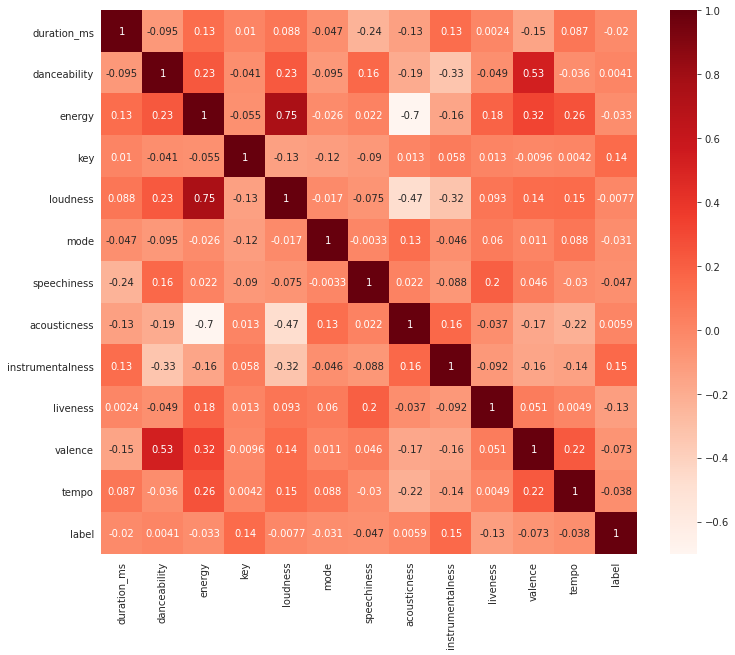

### Features in order of relevance ###
danceability        0.004141
acousticness        0.005939
loudness            0.007741
duration_ms         0.020306
mode                0.031122
energy              0.032913
tempo               0.037738
speechiness         0.047264
valence             0.072740
liveness            0.128315
key                 0.144804
instrumentalness    0.149301
label               1.000000
Name: label, dtype: float64


In [ ]:
features_analysis(dataset_pdf, ["duration_ms", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"], "label")

In [ ]:
TOP_FEATURES = "instrumentalness", "speechiness", "duration_ms", "liveness"

In [ ]:
pairs_correlation(dataset_pdf, TOP_FEATURES)

Input features ('instrumentalness', 'speechiness', 'duration_ms', 'liveness')
                  instrumentalness  speechiness
instrumentalness          1.000000    -0.088354
speechiness              -0.088354     1.000000


                  instrumentalness  duration_ms
instrumentalness          1.000000     0.132038
duration_ms               0.132038     1.000000


                  instrumentalness  liveness
instrumentalness          1.000000 -0.092291
liveness                 -0.092291  1.000000


             speechiness  duration_ms
speechiness     1.000000    -0.235111
duration_ms    -0.235111     1.000000


             speechiness  liveness
speechiness     1.000000  0.199238
liveness        0.199238  1.000000


             duration_ms  liveness
duration_ms     1.000000  0.002437
liveness        0.002437  1.000000




### LR Training and Evaluation

In [ ]:
LR_FEATURES = TOP_FEATURES
lr_model_vanilla = training_pipeline(train=train_new_dag_vanilla_df, 
                                 numerical_features=LR_FEATURES,
                                 target_variable="genres_preprocessed",
                                 with_indexer=True,
                                 with_std=True,
                                 with_mean=True,
                                 k_fold=2,
                                 train_algorithm="lr") 

In [ ]:
summarize_all_models(lr_model_vanilla.subModels, "lr")

*************** Fold #1 ***************

--- Model #1 out of 9 ---
	Parameters: lambda=[0.000]; alpha=[0.000] 
	Model summary: LogisticRegressionModel: uid=LogisticRegression_0a222124615d, numClasses=67, numFeatures=4

--- Model #2 out of 9 ---
	Parameters: lambda=[0.000]; alpha=[0.500] 
	Model summary: LogisticRegressionModel: uid=LogisticRegression_0a222124615d, numClasses=67, numFeatures=4

--- Model #3 out of 9 ---
	Parameters: lambda=[0.000]; alpha=[1.000] 
	Model summary: LogisticRegressionModel: uid=LogisticRegression_0a222124615d, numClasses=67, numFeatures=4

--- Model #4 out of 9 ---
	Parameters: lambda=[0.050]; alpha=[0.000] 
	Model summary: LogisticRegressionModel: uid=LogisticRegression_0a222124615d, numClasses=67, numFeatures=4

--- Model #5 out of 9 ---
	Parameters: lambda=[0.050]; alpha=[0.500] 
	Model summary: LogisticRegressionModel: uid=LogisticRegression_0a222124615d, numClasses=67, numFeatures=4

--- Model #6 out of 9 ---
	Parameters: lambda=[0.050]; alpha=[1.000] 

In [ ]:
print_avg_f1(lr_model_vanilla)

Avg. f1 score computed across k-fold cross validation for model setting #1: 0.052
Avg. f1 score computed across k-fold cross validation for model setting #2: 0.052
Avg. f1 score computed across k-fold cross validation for model setting #3: 0.052
Avg. f1 score computed across k-fold cross validation for model setting #4: 0.090
Avg. f1 score computed across k-fold cross validation for model setting #5: 0.070
Avg. f1 score computed across k-fold cross validation for model setting #6: 0.056
Avg. f1 score computed across k-fold cross validation for model setting #7: 0.088
Avg. f1 score computed across k-fold cross validation for model setting #8: 0.056
Avg. f1 score computed across k-fold cross validation for model setting #9: 0.051


In [ ]:
show_best_model(lr_model_vanilla, training_algorithm="lr")

Best model according to k-fold cross validation: lambda=[0.050]; alfa=[0.000]
LogisticRegressionModel: uid=LogisticRegression_0a222124615d, numClasses=125, numFeatures=4


In [ ]:
training_results(lr_model_vanilla.bestModel.stages[-1].summary)

***** Training Set *****
Accuracy: 0.148
Weighted Precision: 0.100
Weighted Recall: 0.148
Precision by Label: [0.1188118811881188, 0.13513513513513514, 0.14285714285714285, 1.0, 0.0, 0.0, 0.8571428571428571, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Recall by Label: [0.8888888888888888, 0.23809523809523808, 0.17647058823529413, 0.08333333333333333, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0

In [ ]:
evaluate_test_set(test_df, lr_model_vanilla)

***** Test Set *****
Accuracy: 0.133
Weighted Precision: 0.029
Weighted Recall: 0.133


### RF Training and Evaluation

In [ ]:
RF_FEATURES = "duration_ms", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "tempo"

rf_model_vanilla = training_pipeline(train=train_new_dag_vanilla_df, 
                                 numerical_features=RF_FEATURES,
                                 target_variable="genres_preprocessed",
                                 with_indexer=True,
                                 with_std=True,
                                 with_mean=True,
                                 k_fold=2,
                                 train_algorithm="rf")

In [ ]:
summarize_all_models(rf_model_vanilla.subModels, "rf")

*************** Fold #1 ***************

--- Model #1 out of 9 ---
	Parameters: maxDepth=[8]; numTrees=[100] 
	Model summary: RandomForestClassificationModel: uid=RandomForestClassifier_688beaa3e3ed, numTrees=100, numClasses=67, numFeatures=11

--- Model #2 out of 9 ---
	Parameters: maxDepth=[8]; numTrees=[120] 
	Model summary: RandomForestClassificationModel: uid=RandomForestClassifier_688beaa3e3ed, numTrees=120, numClasses=67, numFeatures=11

--- Model #3 out of 9 ---
	Parameters: maxDepth=[8]; numTrees=[140] 
	Model summary: RandomForestClassificationModel: uid=RandomForestClassifier_688beaa3e3ed, numTrees=140, numClasses=67, numFeatures=11

--- Model #4 out of 9 ---
	Parameters: maxDepth=[10]; numTrees=[100] 
	Model summary: RandomForestClassificationModel: uid=RandomForestClassifier_688beaa3e3ed, numTrees=100, numClasses=67, numFeatures=11

--- Model #5 out of 9 ---
	Parameters: maxDepth=[10]; numTrees=[120] 
	Model summary: RandomForestClassificationModel: uid=RandomForestClassif

In [ ]:
print_avg_f1(rf_model_vanilla)

Avg. f1 score computed across k-fold cross validation for model setting #1: 0.089
Avg. f1 score computed across k-fold cross validation for model setting #2: 0.098
Avg. f1 score computed across k-fold cross validation for model setting #3: 0.091
Avg. f1 score computed across k-fold cross validation for model setting #4: 0.097
Avg. f1 score computed across k-fold cross validation for model setting #5: 0.075
Avg. f1 score computed across k-fold cross validation for model setting #6: 0.093
Avg. f1 score computed across k-fold cross validation for model setting #7: 0.084
Avg. f1 score computed across k-fold cross validation for model setting #8: 0.073
Avg. f1 score computed across k-fold cross validation for model setting #9: 0.096


In [ ]:
show_best_model(rf_model_vanilla, training_algorithm="rf")

Best model according to k-fold cross validation: max depth=[8.000]; num trees=[120.000]
RandomForestClassificationModel: uid=RandomForestClassifier_688beaa3e3ed, numTrees=120, numClasses=125, numFeatures=11


In [ ]:
training_results(rf_model_vanilla.bestModel.stages[-1].summary)

***** Training Set *****
Accuracy: 0.985
Weighted Precision: 0.975
Weighted Recall: 0.985
Precision by Label: [0.9, 0.9545454545454546, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Recall by Label: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6666666666666666, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1

In [ ]:
evaluate_test_set(test_df, rf_model_vanilla)

***** Test Set *****
Accuracy: 0.145
Weighted Precision: 0.077
Weighted Recall: 0.145


# Approach 2: With Clustering

### Checkpoint the DAG

In [ ]:
genres_list = genres_preprocessed_df.collect()
genres_new_dag_df= spark.createDataFrame(genres_list)
genres_new_dag_df.printSchema()
del genres_list
gc.collect()

root
 |-- mode: long (nullable = true)
 |-- genres: string (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- danceability: double (nullable = true)
 |-- duration_ms: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- popularity: double (nullable = true)
 |-- key: long (nullable = true)
 |-- genres_terms_preprocessed: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- genres_preprocessed: string (nullable = true)



105

### PCA Analysis

In [ ]:
def pca_analysis(dataset, 
            numerical_features,
            K, 
            distance_measure, 
            max_iter, 
            tol,
            target_variable,
            features_col, 
            prediction_col, 
            random_seed):

  from pyspark.ml.feature import VectorAssembler, StandardScaler, PCA
  from pyspark.ml import Pipeline

  # Assemble all the features (both one-hot-encoded categorical and numerical) into a single vector
  assembler = VectorAssembler(inputCols=numerical_features, outputCol="features")
  stages = [assembler]

  scaler = StandardScaler(inputCol="features", 
                        outputCol="std_features",
                        withStd=True, withMean=True)
  stages += [scaler]


  pca = PCA(k=K, inputCol="std_features", outputCol="pca_features")
  stages += [pca]

  pipeline = Pipeline(stages=stages)
  pca_model = pipeline.fit(dataset)
  pca_df = pca_model.transform(dataset)

  return pca_model, pca_df

In [ ]:
import numpy as np

FEATURES = "duration_ms", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"
k=12
DISTANCE_MEASURE = "cosine" 
MAX_ITERATIONS = 100
TOLERANCE = 0.000001 
TARGET_VARIABLE = "genres_preprocessed" 
PREDICTION_COL = "cluster"
FEATURESS_COL = "features"

pca_model, pca_df = pca_analysis(dataset=genres_preprocessed_df, 
                numerical_features=FEATURES,
                K=k, 
                distance_measure=DISTANCE_MEASURE, 
                max_iter=MAX_ITERATIONS, 
                tol=TOLERANCE,
                features_col=FEATURESS_COL, 
                prediction_col=PREDICTION_COL,
                target_variable=TARGET_VARIABLE,
                random_seed=RANDOM_SEED)


In [ ]:
''' To print the cumulative variance for each pca_k '''
from numpy import cumsum
total_variances = np.cumsum(pca_model.stages[-1].explainedVariance.values) 
total_variances

array([0.30782858, 0.43680128, 0.53707176, 0.62511615, 0.7078103 ,
       0.78057147, 0.84427694, 0.90007673, 0.95184256, 0.97838404,
       0.99462092, 1.        ])

In [ ]:
''' To print the explained variance for each eigenvalue '''
pca_model.stages[-1].explainedVariance.values

array([0.30782858, 0.1289727 , 0.10027047, 0.08804439, 0.08269415,
       0.07276117, 0.06370547, 0.05579979, 0.05176583, 0.02654147,
       0.01623688, 0.00537908])

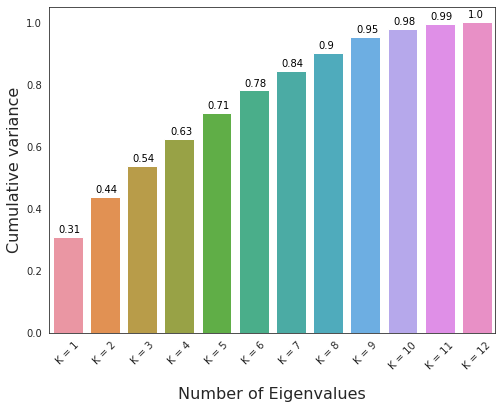

In [ ]:
''' To plot the cumulative variance for each pca_k '''
fig, ax = plt.subplots(1,1,figsize=(8,6))
_ = sns.barplot(x=[i for i in range(len(FEATURES))], 
                y=total_variances, # `explainedVariance` returns the distribution of variance across eigenvectors, i.e., lambda_i/sum lambda_i
                ax=ax)
_ = ax.set_xlabel("Number of Eigenvalues", labelpad=16, fontsize=16)
_ = ax.set_ylabel("Cumulative variance", fontsize=16)
_ = ax.set_xticklabels(["K = {:d}".format(i) for i in range(1, len(FEATURES)+1)], rotation=45)

for i in range(0, len(FEATURES)):
    ax.text(x=i-.25, y=total_variances[i]+.014, s=str(builtins.round(total_variances[i],2 )), color = 'black', fontweight = 'light')


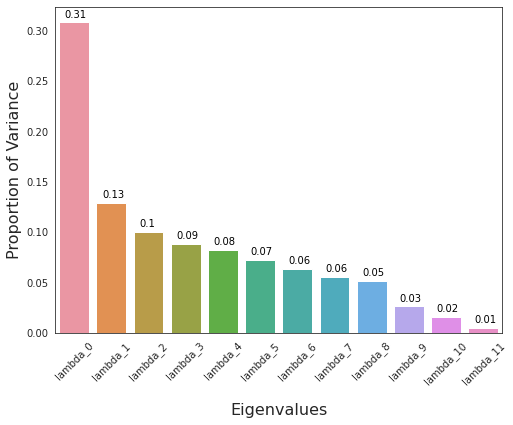

In [ ]:
''' To plot the explained variance for each k '''
fig, ax = plt.subplots(1,1,figsize=(8,6))
_ = sns.barplot(x=[i for i in range(k)], 
                y=pca_model.stages[-1].explainedVariance.values, # `explainedVariance` returns the distribution of variance across eigenvectors, i.e., lambda_i/sum lambda_i
                ax=ax)
_ = ax.set_xlabel("Eigenvalues", labelpad=16, fontsize=16)
_ = ax.set_ylabel("Proportion of Variance", fontsize=16)
_ = ax.set_xticklabels(["lambda_{:d}".format(i) for i in range(k)], rotation=45)

for i in range(0, k):
    ax.text(x=i-.25, y=pca_model.stages[-1].explainedVariance.values[i]+.005, s=str(builtins.round(pca_model.stages[-1].explainedVariance.values[i],2 )), color = 'black', fontweight = 'light')


In [ ]:
# Clear memory
del pca_model, pca_df
gc.collect()

4756

### Clustering

In [ ]:
DISTANCE_MEASURE = "cosine" 
MAX_ITERATIONS = 150
TOLERANCE = 0.000001   
CLUSTERING_FEATURES = "duration_ms", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"
PREDICTION_COL = "cluster"

In [ ]:
clustering_cycles = []

for pca_k in [2, 3, 4]:
    clustering_models = []
    cost = np.zeros(20)
    for k in range(2,20): 
        model, cluster_df = k_means(genres_new_dag_df,
                        n_clusters=k, 
                        pca_k=pca_k,
                        features=CLUSTERING_FEATURES,
                        distance_measure=DISTANCE_MEASURE, 
                        max_iter=MAX_ITERATIONS, 
                        tol=TOLERANCE,
                        prediction_col=PREDICTION_COL,
                        random_seed=RANDOM_SEED)

        clustering_models.append([model, cluster_df])
        cost[k] = model.stages[-1].summary.trainingCost
  
    clustering_cycles.append({"pca": pca_k, "models": clustering_models, "costs": cost})

Training K-means clustering using the following parameters: 
    - K (n. of clusters) = 2
    - max_iter (max n. of iterations) = 150
    - distance measure = cosine
    - random seed = 128
    
Training K-means clustering using the following parameters: 
    - K (n. of clusters) = 3
    - max_iter (max n. of iterations) = 150
    - distance measure = cosine
    - random seed = 128
    
Training K-means clustering using the following parameters: 
    - K (n. of clusters) = 4
    - max_iter (max n. of iterations) = 150
    - distance measure = cosine
    - random seed = 128
    
Training K-means clustering using the following parameters: 
    - K (n. of clusters) = 5
    - max_iter (max n. of iterations) = 150
    - distance measure = cosine
    - random seed = 128
    
Training K-means clustering using the following parameters: 
    - K (n. of clusters) = 6
    - max_iter (max n. of iterations) = 150
    - distance measure = cosine
    - random seed = 128
    
Training K-means clusteri

For each pca k, the elbow is at around k in [6, 8]

### Elbow curve for PCA K = 2 ###


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


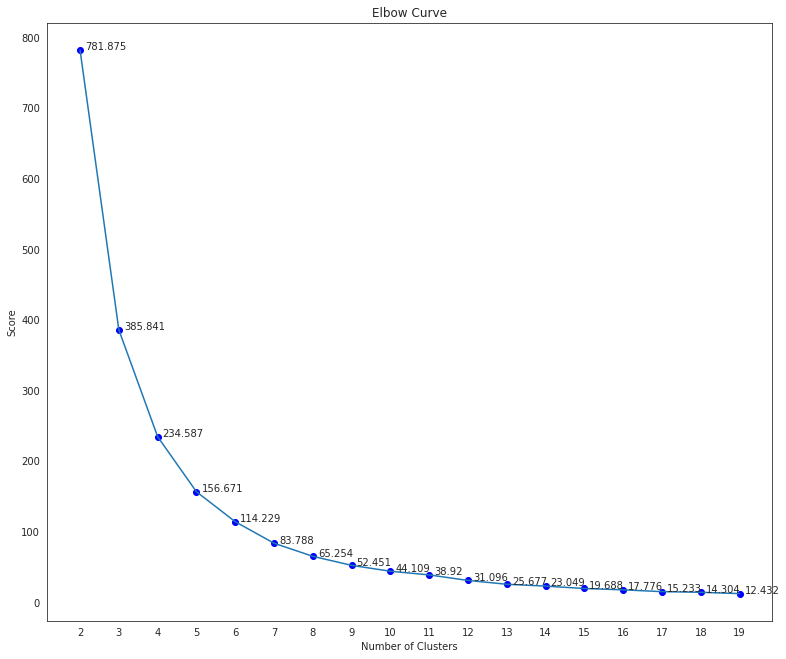



### Elbow curve for PCA K = 3 ###


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


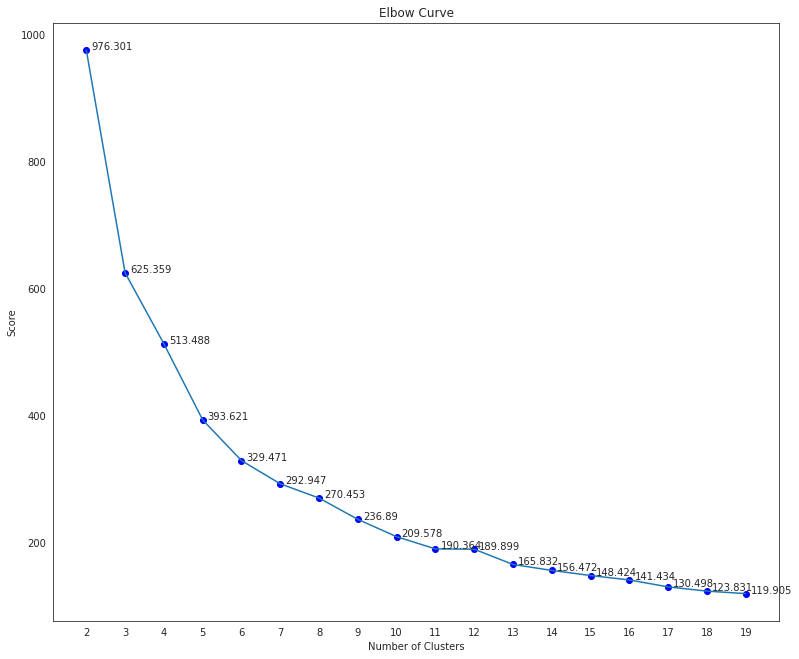



### Elbow curve for PCA K = 4 ###


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


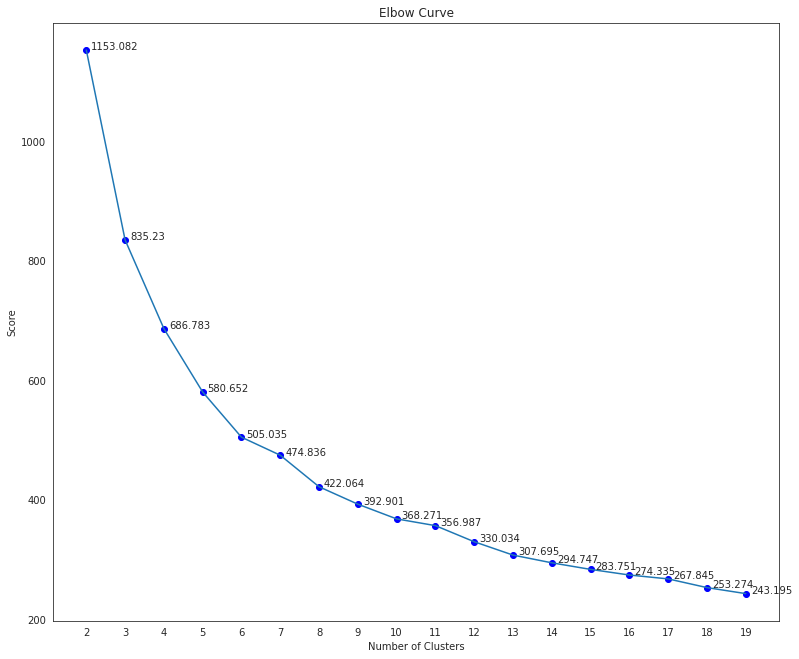

In [ ]:
# Plot the cost
for cluster_cycle in clustering_cycles:
    print("### Elbow curve for PCA K = {} ###".format(cluster_cycle["pca"]))
    elbow_curve(cluster_cycle["costs"], 2, 20)
    print("\n")

In [ ]:
score_groups = []
print("SILHOUETTE SCORE ")
for cluster_cycle in clustering_cycles:
    print("### SCORE FOR PCA K = {}".format(cluster_cycle["pca"]))
    scores = []
    for i, result in enumerate(cluster_cycle["models"]):
        score = evaluate_k_means(result[1], distance_measure="cosine", features_col="pca_features")
        scores.append(score)
        print("Cluster {}: score: {} ".format(i+2,score))
    score_groups.append(scores)
    print("\n")

SILHOUETTE SCORE 
### SCORE FOR PCA K = 2
Cluster 2: score: 0.6753095244229762 
Cluster 3: score: 0.7001534670351031 
Cluster 4: score: 0.7055486548112596 
Cluster 5: score: 0.698034153252753 
Cluster 6: score: 0.6960302948470457 
Cluster 7: score: 0.7097450826578959 
Cluster 8: score: 0.6980935219856815 
Cluster 9: score: 0.693175266182832 
Cluster 10: score: 0.6799657868891158 
Cluster 11: score: 0.6755111711623706 
Cluster 12: score: 0.6822485396811001 
Cluster 13: score: 0.6805493312704074 
Cluster 14: score: 0.678161758755297 
Cluster 15: score: 0.6860931999905175 
Cluster 16: score: 0.6892297372371452 
Cluster 17: score: 0.6910666591646645 
Cluster 18: score: 0.6849357912577643 
Cluster 19: score: 0.6771515977522291 


### SCORE FOR PCA K = 3
Cluster 2: score: 0.5909595527452404 
Cluster 3: score: 0.5686221283208984 
Cluster 4: score: 0.5529658856709067 
Cluster 5: score: 0.5411774342431365 
Cluster 6: score: 0.5201000326174599 
Cluster 7: score: 0.5239188307912349 
Cluster 8: sc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


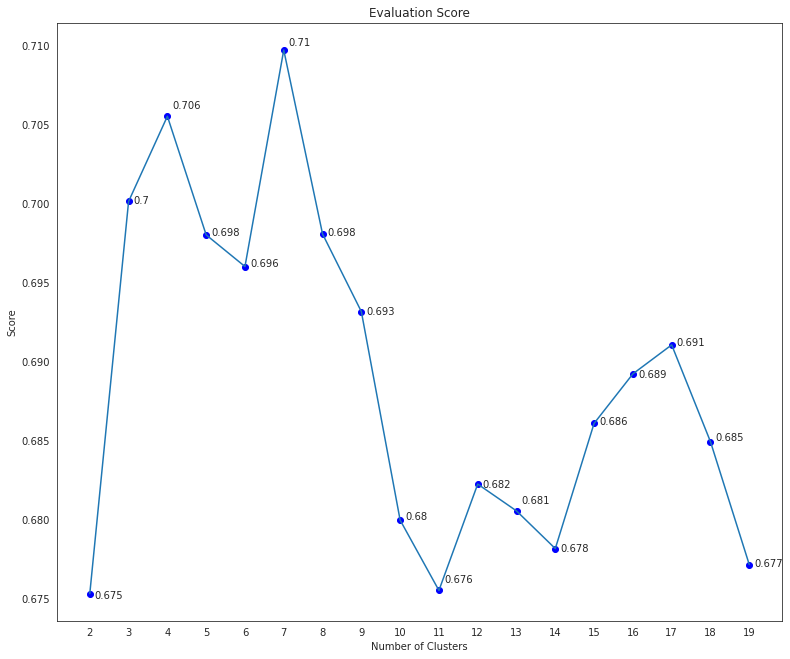

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


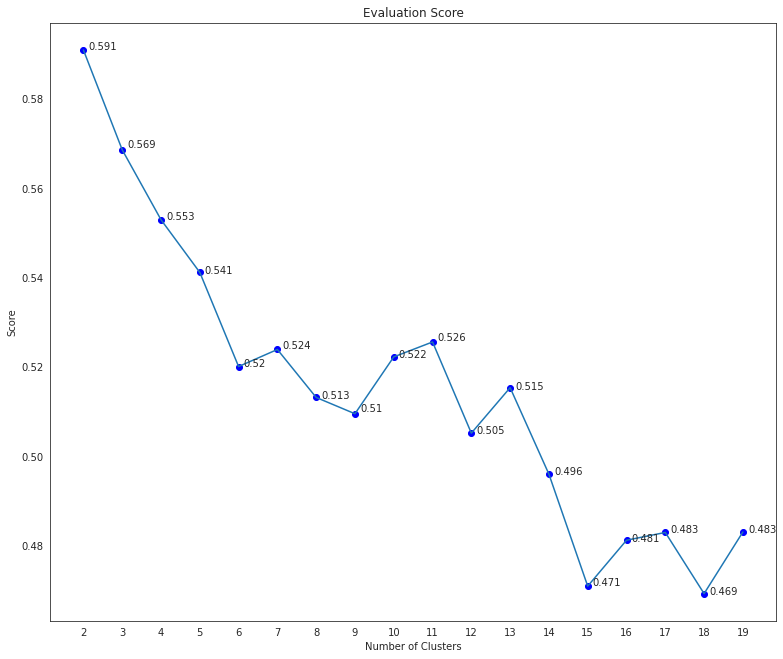

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


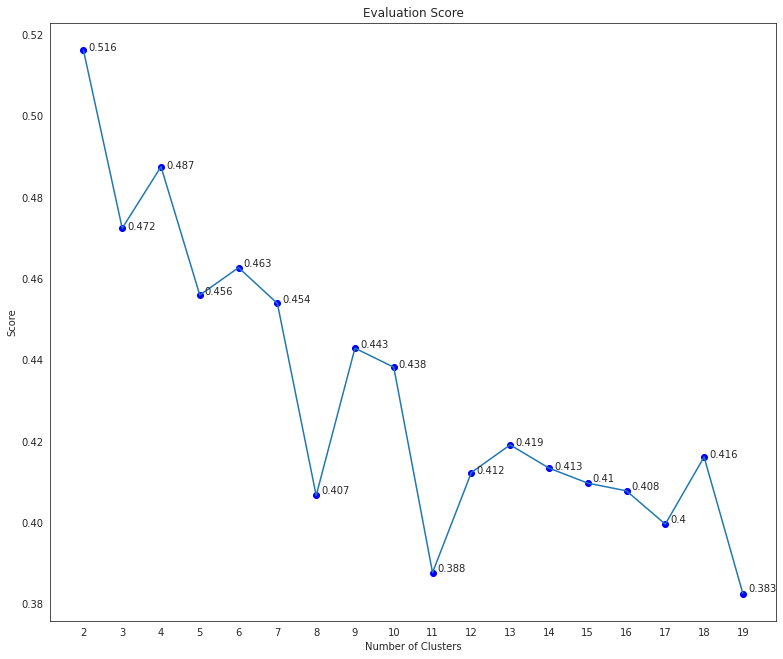

In [ ]:
for score_group in score_groups:
    plot_evaluation_score(score_group)

The best scoring model is the one with PCA K = 2

In [ ]:
clustering_models = clustering_cycles[0]["models"]

In [ ]:
def clusters_info(cluster_list):
    # Show the results
    for x_id, x in enumerate(cluster_list):
        print("Showing the first 10 records of cluster ID #{:d}".format(x_id))
        x.select(["cluster", "genres", "genres_preprocessed"]).show(10, truncate=False)


In [ ]:
def clusters_frequent_labels(cluster_list):
    for x_id, x in enumerate(cluster_list):
        print("Top frequent labels of cluster ID #{:d}".format(x_id))
        x.select(["cluster", "genres", "genres_preprocessed"]).groupBy("genres_preprocessed").count().orderBy(desc("count")).show(15, truncate=False)

In [ ]:
for tmp_cluster_df in [clustering_models[4][1], clustering_models[5][1], clustering_models[6][1]]:

    tot_clusters = tmp_cluster_df.select("cluster").orderBy(desc("cluster")).limit(1).collect()[0]["cluster"] + 1 

    cluster_list = [tmp_cluster_df.where(tmp_cluster_df.cluster == x) for x in range(tot_clusters)]
    print("####################################")
    print("######## TOTAL CLUSTERS: {} ########".format(tot_clusters))
    print("####################################")

    clusters = sorted([x[0] for x in tmp_cluster_df.select("cluster").distinct().collect()])
    
    print("Cluster IDs: [{:s}]".format(", ".join([str(c) for c in clusters])))
    clusters_info(cluster_list)

####################################
######## TOTAL CLUSTERS: 6 ########
####################################
Cluster IDs: [0, 1, 2, 3, 4, 5]
Showing the first 10 records of cluster ID #0
+-------+---------------------+-------------------+
|cluster|genres               |genres_preprocessed|
+-------+---------------------+-------------------+
|0      |a cappella           |cappella           |
|0      |accordeon            |accordeon          |
|0      |accordion            |accordion          |
|0      |acoustic blues       |acoust blue        |
|0      |acoustic pop         |acoust pop         |
|0      |adult standards      |adult standard     |
|0      |adventista           |adventista         |
|0      |afghan traditional   |tradit             |
|0      |american folk revival|folk reviv         |
|0      |anadolu rock         |anadolu rock       |
+-------+---------------------+-------------------+
only showing top 10 rows

Showing the first 10 records of cluster ID #1
+-------+---

Now that I found a good interval, I choose the best K of clustering according to the relevance of the clusters

In [ ]:
for tmp_cluster_df in [clustering_models[4][1], clustering_models[5][1], clustering_models[8][1]]:
    tot_clusters = tmp_cluster_df.select("cluster").orderBy(desc("cluster")).limit(1).collect()[0]["cluster"] + 1 

    cluster_list = [tmp_cluster_df.where(tmp_cluster_df.cluster == x) for x in range(tot_clusters)]
    print("####################################")
    print("######## TOTAL CLUSTERS: {} ########".format(tot_clusters))
    print("####################################")
    
    clusters = sorted([x[0] for x in tmp_cluster_df.select("cluster").distinct().collect()])
    print("Cluster IDs: [{:s}]".format(", ".join([str(c) for c in clusters])))
    clusters_frequent_labels(cluster_list)

####################################
######## TOTAL CLUSTERS: 6 ########
####################################
Cluster IDs: [0, 1, 2, 3, 4, 5]
Top frequent labels of cluster ID #0
+-------------------+-----+
|genres_preprocessed|count|
+-------------------+-----+
|pop                |12   |
|folk               |10   |
|tradit             |8    |
|classic pop        |7    |
|indi               |7    |
|singersongwrit     |6    |
|jazz               |6    |
|                   |4    |
|indi folk          |4    |
|vintag pop         |4    |
|a                  |4    |
|rock               |3    |
|movi tune          |2    |
|tradit folk        |2    |
|chillhop           |2    |
+-------------------+-----+
only showing top 15 rows

Top frequent labels of cluster ID #1
+-------------------+-----+
|genres_preprocessed|count|
+-------------------+-----+
|pop                |41   |
|hip hop            |37   |
|indi               |19   |
|rock               |14   |
|rap                |8    |
|r

Seven clusters seems to be a good choice.
They can represent the different main genres in this way:
- Cluster 0: Metal/Hardstyle
- Cluster 1: Experimental/Progressive
- Cluster 2: Classic/Piano/Jazz
- Cluster 3: Rock/Punk/Indie
- Cluster 4: Blues/Soul
- Cluster 5: Hip hop/Rap
- Cluster 6: Folk/Songwriting

In [ ]:
cluster_df = clustering_models[5][1]
knn_mus_model = clustering_models[5][0]

In [ ]:
cluster_df.groupBy("cluster").count().sort("cluster").show()

+-------+-----+
|cluster|count|
+-------+-----+
|      0|  386|
|      1|  174|
|      2|  544|
|      3|  525|
|      4|  321|
|      5|  655|
|      6|  367|
+-------+-----+



### Assign cluster to tracks

In [ ]:
tracks_with_clusters_by_musical_features_df = knn_mus_model.transform(tracks_with_ranges_df).cache()  

In [ ]:
tracks_with_clusters_by_musical_features_df.show(5, False)
tracks_with_clusters_by_musical_features_df.groupBy("cluster").count().orderBy("cluster").show(truncate=False)

+----------------------+---------------------------------------------------------------------+----------+-----------+--------+--------------------------------------------------+------------------------------------------------------------------------------+------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------+-------+
|id                    |name                                                                 |popularity|duration_ms|explicit|artists                                           |id_artists                                                        

In [ ]:
# Unpersist each clustering df and free memory
import gc

cluster_df.unpersist()
for models_each_cycle in clustering_cycles:
    for model in models_each_cycle["models"]:
        model[1].unpersist()
        del model
    del models_each_cycle
del clustering_cycles

for clustering_model in clustering_models:
  clustering_model[1].unpersist()
  del clustering_model
del clustering_models

gc.collect()

22169

### Feature analysis

In [ ]:
dataset_df = prepare_dataset(tracks_with_clusters_by_musical_features_df, sample_percentage=.8, random_seed=42, with_cluster=True)
dataset_df = dataset_df.withColumnRenamed("cluster", "label").cache()

dataset_df.collect()
dataset_df.count()

466813

In [ ]:
train_df, test_df = dataset_df.randomSplit([0.7, 0.3], seed=128) 
train_df.groupBy("label").count().orderBy("label").show(truncate=False)

+-----+-----+
|label|count|
+-----+-----+
|0    |30056|
|1    |18870|
|2    |48253|
|3    |49655|
|4    |61232|
|5    |71455|
|6    |47401|
+-----+-----+



In [ ]:
dataset_df.count()

466813

Checkpoint the DAG

In [ ]:
train_list = train_df.collect()
train_new_dag_df= spark.createDataFrame(train_list)
train_new_dag_df.printSchema()
del train_list
gc.collect()

root
 |-- duration_ms: double (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: long (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: long (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- label: long (nullable = true)



105

In [ ]:
train_df.unpersist()

DataFrame[duration_ms: double, danceability: double, energy: double, key: int, loudness: double, mode: int, speechiness: double, acousticness: double, instrumentalness: double, liveness: double, valence: double, tempo: double, label: int]

In [ ]:
dataset_pdf = train_new_dag_df.toPandas()

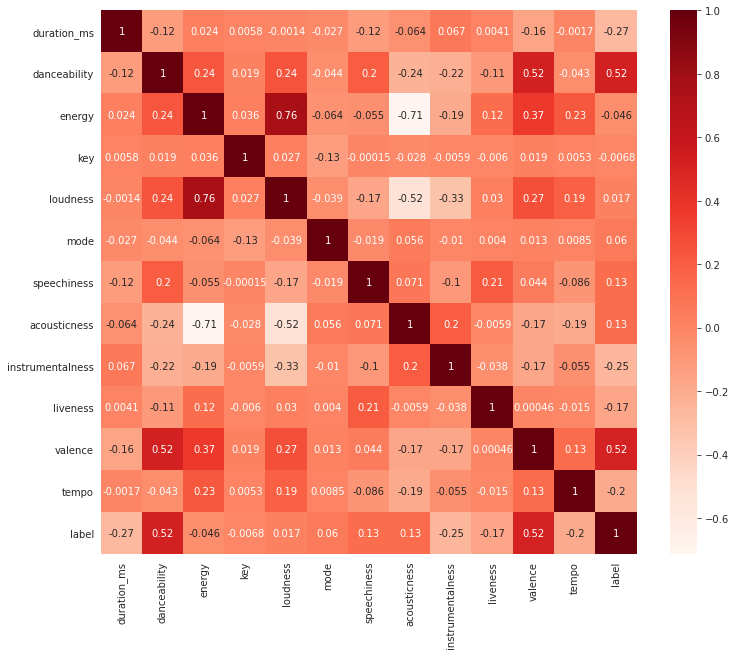

### Features in order of relevance ###
key                 0.006837
loudness            0.016777
energy              0.045529
mode                0.059503
speechiness         0.125891
acousticness        0.130094
liveness            0.166139
tempo               0.196879
instrumentalness    0.251597
duration_ms         0.273673
valence             0.516487
danceability        0.520815
label               1.000000
Name: label, dtype: float64


In [ ]:
features_analysis(dataset_pdf, ["duration_ms", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"], "label")

In [ ]:
TOP_FEATURES= "danceability", "valence", "duration_ms", "instrumentalness", "tempo", "liveness"

In [ ]:
pairs_correlation(dataset_pdf, TOP_FEATURES)

Input features ('danceability', 'valence', 'duration_ms', 'instrumentalness', 'tempo', 'liveness')
              danceability   valence
danceability      1.000000  0.523314
valence           0.523314  1.000000


              danceability  duration_ms
danceability      1.000000    -0.119348
duration_ms      -0.119348     1.000000


                  danceability  instrumentalness
danceability          1.000000         -0.224427
instrumentalness     -0.224427          1.000000


              danceability     tempo
danceability      1.000000 -0.043339
tempo            -0.043339  1.000000


              danceability  liveness
danceability      1.000000 -0.106072
liveness         -0.106072  1.000000


              valence  duration_ms
valence      1.000000    -0.161386
duration_ms -0.161386     1.000000


                   valence  instrumentalness
valence           1.000000         -0.173822
instrumentalness -0.173822          1.000000


          valence     tempo
valence  1.000000  

### LR Training and Evaluation

In [ ]:
train_new_dag_df.show()

+-----------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+-----+
|duration_ms|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|label|
+-----------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+-----+
|    23933.0|       0.298|0.0398|  4| -20.941|   1|     0.0673|       0.981|         2.91E-4|   0.085|  0.342| 85.704|    6|
|    33764.0|       0.488| 0.732|  4| -10.448|   0|      0.143|      0.0704|             0.0|    0.43|    0.9|136.899|    5|
|    35738.0|       0.702| 0.428|  2| -10.578|   1|     0.0686|       0.989|         5.08E-5|   0.167|   0.96|134.602|    4|
|    35933.0|       0.438| 0.274|  0| -13.897|   0|     0.0527|        0.92|             0.0|   0.673|  0.397|126.755|    2|
|    44840.0|         0.0|  0.13| 10|  -20.51|   1|        0.0|       0.951|         6.79E-6|   0.766|    0.0|    0.0|    2|


In [ ]:
gc.collect()

13206

In [ ]:
LR_FEATURES= "danceability", "duration_ms", "tempo", "liveness"
lr_model_mus = training_pipeline(train=train_new_dag_df, 
                                 numerical_features=LR_FEATURES,
                                 target_variable="label", 
                                 with_std=True,
                                 with_mean=True,
                                 k_fold=2,
                                 train_algorithm="lr") #rf for random forest

In [ ]:
# Call the function above|
summarize_all_models(lr_model_mus.subModels, "lr")

*************** Fold #1 ***************

--- Model #1 out of 9 ---
	Parameters: lambda=[0.000]; alpha=[0.000] 
	Model summary: LogisticRegressionModel: uid=LogisticRegression_54c7a89adc01, numClasses=7, numFeatures=4

--- Model #2 out of 9 ---
	Parameters: lambda=[0.000]; alpha=[0.500] 
	Model summary: LogisticRegressionModel: uid=LogisticRegression_54c7a89adc01, numClasses=7, numFeatures=4

--- Model #3 out of 9 ---
	Parameters: lambda=[0.000]; alpha=[1.000] 
	Model summary: LogisticRegressionModel: uid=LogisticRegression_54c7a89adc01, numClasses=7, numFeatures=4

--- Model #4 out of 9 ---
	Parameters: lambda=[0.050]; alpha=[0.000] 
	Model summary: LogisticRegressionModel: uid=LogisticRegression_54c7a89adc01, numClasses=7, numFeatures=4

--- Model #5 out of 9 ---
	Parameters: lambda=[0.050]; alpha=[0.500] 
	Model summary: LogisticRegressionModel: uid=LogisticRegression_54c7a89adc01, numClasses=7, numFeatures=4

--- Model #6 out of 9 ---
	Parameters: lambda=[0.050]; alpha=[1.000] 
	Mod

In [ ]:
print_avg_f1(lr_model_mus)

Avg. f1 score computed across k-fold cross validation for model setting #1: 0.471
Avg. f1 score computed across k-fold cross validation for model setting #2: 0.471
Avg. f1 score computed across k-fold cross validation for model setting #3: 0.471
Avg. f1 score computed across k-fold cross validation for model setting #4: 0.420
Avg. f1 score computed across k-fold cross validation for model setting #5: 0.380
Avg. f1 score computed across k-fold cross validation for model setting #6: 0.283
Avg. f1 score computed across k-fold cross validation for model setting #7: 0.378
Avg. f1 score computed across k-fold cross validation for model setting #8: 0.241
Avg. f1 score computed across k-fold cross validation for model setting #9: 0.170


In [ ]:
show_best_model(lr_model_mus, training_algorithm="lr")

Best model according to k-fold cross validation: lambda=[0.000]; alfa=[0.000]
LogisticRegressionModel: uid=LogisticRegression_54c7a89adc01, numClasses=7, numFeatures=4


In [ ]:
training_results(lr_model_mus.bestModel.stages[-1].summary)

***** Training Set *****
Accuracy: 0.480
Weighted Precision: 0.482
Weighted Recall: 0.480
Precision by Label: [0.46299793956043955, 0.5663865546218487, 0.5313424666906118, 0.43158923336590566, 0.5182144323272708, 0.47928645489678573, 0.42121069920225246]
Recall by Label: [0.3588634548842161, 0.16073131955484896, 0.6438148923383002, 0.4892155875541235, 0.4741638359027959, 0.569281365894619, 0.3787261872112403]


In [ ]:
evaluate_test_set(test_df, lr_model_mus.bestModel)

***** Test Set *****
Accuracy: 0.480
Weighted Precision: 0.483
Weighted Recall: 0.480


root
 |-- prediction: double (nullable = false)
 |-- label: double (nullable = false)



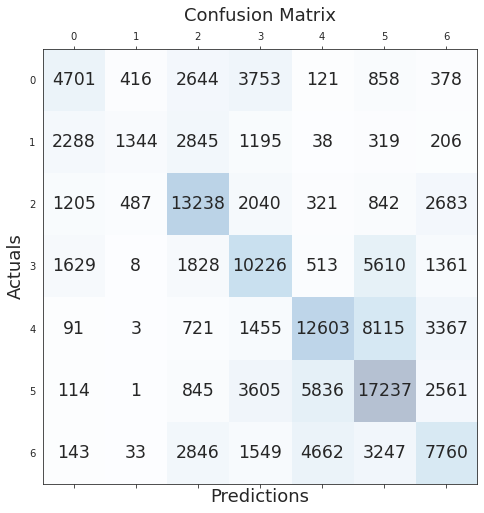

In [ ]:
confusion_matrix(test_df, lr_model_mus.bestModel)

### RF Training and Evaluation

In [ ]:
train_list = train_df.collect()
train_new_dag_df = spark.createDataFrame(train_list).cache()
train_new_dag_df.collect()
train_new_dag_df.printSchema()
del train_list
gc.collect()

root
 |-- duration_ms: double (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: long (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: long (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- label: long (nullable = true)



7

In [ ]:
train_new_dag_df.show()

+-----------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+-----+
|duration_ms|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|label|
+-----------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+-----+
|    23933.0|       0.298|0.0398|  4| -20.941|   1|     0.0673|       0.981|         2.91E-4|   0.085|  0.342| 85.704|    6|
|    33764.0|       0.488| 0.732|  4| -10.448|   0|      0.143|      0.0704|             0.0|    0.43|    0.9|136.899|    5|
|    35738.0|       0.702| 0.428|  2| -10.578|   1|     0.0686|       0.989|         5.08E-5|   0.167|   0.96|134.602|    4|
|    35933.0|       0.438| 0.274|  0| -13.897|   0|     0.0527|        0.92|             0.0|   0.673|  0.397|126.755|    2|
|    44840.0|         0.0|  0.13| 10|  -20.51|   1|        0.0|       0.951|         6.79E-6|   0.766|    0.0|    0.0|    2|


In [ ]:
RF_FEATURES = "mode", "acousticness", "energy", "duration_ms", "speechiness", "loudness", "instrumentalness", "liveness", "danceability", "valence", "key"

rf_model_mus = training_pipeline(train=train_new_dag_df, 
                                 numerical_features=RF_FEATURES,
                                 target_variable="label", 
                                 with_std=True,
                                 with_mean=True,
                                 k_fold=2,
                                 train_algorithm="rf")


In [ ]:
# Call the function above|
summarize_all_models(rf_model_mus.subModels, "rf")

*************** Fold #1 ***************

--- Model #1 out of 9 ---
	Parameters: maxDepth=[8]; numTrees=[100] 
	Model summary: RandomForestClassificationModel: uid=RandomForestClassifier_cc97defbebcf, numTrees=100, numClasses=7, numFeatures=11

--- Model #2 out of 9 ---
	Parameters: maxDepth=[8]; numTrees=[120] 
	Model summary: RandomForestClassificationModel: uid=RandomForestClassifier_cc97defbebcf, numTrees=120, numClasses=7, numFeatures=11

--- Model #3 out of 9 ---
	Parameters: maxDepth=[8]; numTrees=[140] 
	Model summary: RandomForestClassificationModel: uid=RandomForestClassifier_cc97defbebcf, numTrees=140, numClasses=7, numFeatures=11

--- Model #4 out of 9 ---
	Parameters: maxDepth=[10]; numTrees=[100] 
	Model summary: RandomForestClassificationModel: uid=RandomForestClassifier_cc97defbebcf, numTrees=100, numClasses=7, numFeatures=11

--- Model #5 out of 9 ---
	Parameters: maxDepth=[10]; numTrees=[120] 
	Model summary: RandomForestClassificationModel: uid=RandomForestClassifier_

In [ ]:
print_avg_f1(rf_model_mus)

Avg. f1 score computed across k-fold cross validation for model setting #1: 0.704
Avg. f1 score computed across k-fold cross validation for model setting #2: 0.704
Avg. f1 score computed across k-fold cross validation for model setting #3: 0.704
Avg. f1 score computed across k-fold cross validation for model setting #4: 0.730
Avg. f1 score computed across k-fold cross validation for model setting #5: 0.731
Avg. f1 score computed across k-fold cross validation for model setting #6: 0.731
Avg. f1 score computed across k-fold cross validation for model setting #7: 0.748
Avg. f1 score computed across k-fold cross validation for model setting #8: 0.749
Avg. f1 score computed across k-fold cross validation for model setting #9: 0.749


In [ ]:
rf_model_mus.bestModel.stages[-1]._java_obj.getNumTrees()

120

In [ ]:
show_best_model(rf_model_mus, training_algorithm="rf")

Best model according to k-fold cross validation: max depth=[12.000]; num trees=[120.000]
RandomForestClassificationModel: uid=RandomForestClassifier_cc97defbebcf, numTrees=120, numClasses=7, numFeatures=11


In [ ]:
training_results(rf_model_mus.bestModel.stages[-1].summary)

***** Training Set *****
Accuracy: 0.784
Weighted Precision: 0.784
Weighted Recall: 0.784
Precision by Label: [0.8063699573840879, 0.7975941422594143, 0.8267682688550215, 0.7685306625332856, 0.7635573430202387, 0.7702275555301286, 0.7832987997967082]
Recall by Label: [0.8373036997604472, 0.4848966613672496, 0.8769195697676828, 0.7788540932433793, 0.7689443428272799, 0.7536491498145687, 0.8453830087972828]


In [ ]:
evaluate_test_set(test_df, rf_model_mus.bestModel)

***** Test Set *****
Accuracy: 0.753
Weighted Precision: 0.752
Weighted Recall: 0.753


root
 |-- prediction: double (nullable = false)
 |-- label: double (nullable = false)



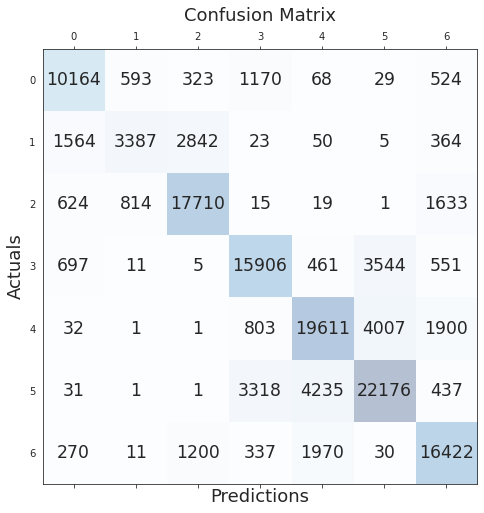

In [ ]:
confusion_matrix(test_df, rf_model_mus.bestModel)

### Further improvements for final model

The data seems to be unbalanced. Let's try to balance them.
Since the dataset is huge, undersampling instead of oversampling is a good choice.

In [ ]:
dataset_df = prepare_dataset(tracks_with_clusters_by_musical_features_df, sample_percentage=1.0, random_seed=RANDOM_SEED, with_cluster=True)
dataset_df = dataset_df.withColumnRenamed("cluster", "label").cache()

dataset_df.collect()
dataset_df.count()
tracks_with_clusters_by_musical_features_df.unpersist()

DataFrame[id: string, name: string, popularity: double, duration_ms: double, explicit: string, artists: string, id_artists: string, release_date: string, danceability: double, energy: double, key: int, loudness: double, mode: int, speechiness: double, acousticness: double, instrumentalness: double, liveness: double, valence: double, tempo: double, time_signature: int, features: vector, std_features: vector, pca_features: vector, cluster: int]

In [ ]:
train_df, test_df = dataset_df.randomSplit([0.7, 0.3], seed=RANDOM_SEED) 
train_df.groupBy("label").count().orderBy("label").show(truncate=False)

+-----+-----+
|label|count|
+-----+-----+
|0    |37510|
|1    |23648|
|2    |60640|
|3    |61861|
|4    |76430|
|5    |89018|
|6    |59209|
+-----+-----+



In [ ]:
'''
  To automatically find the label with the lowest occurrence and to perform the undersampling based on it
'''
def undersample_training_dataframe(df, random_seed):
    # Get all the available labels
    num_labels = df.select("label").distinct().count()
    print ("Undersampling on {} labels".format(num_labels))

    # Count the occurrences of the labels
    labels_count = [ df.groupBy("label").count().orderBy("label").select("count").collect()[i]["count"] for i in range(num_labels) ]
    print(labels_count)

    # Find the lowest occurrence    

    # Find the label with the lowest occurrence
    base_label =np.argmin(np.int_(labels_count))
    print ("Base label: {}".format(base_label))
    
    # Create the new dataframe
    undersampled_df = df.where("label == " + str(base_label))
    undersampled_df.collect()

    # For each label
    for i in range(num_labels):
        if base_label == i:
            continue
        # Find the rate for the undersampling
        rate = labels_count[base_label] / labels_count[i]
        # Extract a sample
        _ = df.where("label == " + str(i)).sample(False, rate, random_seed).cache()
        print("Label: {} sample rate: {}%, new count: {}".format(i, builtins.round(rate*100,2), _.count()))
        # Union with the rest of the data
        undersampled_df = undersampled_df.union(_)
        _.unpersist()

    return undersampled_df

In [ ]:
train_balanced_df = undersample_training_dataframe(train_df, random_seed=RANDOM_SEED).cache()
train_balanced_df.show(15)

Undersampling on 7 labels
[37510, 23648, 60640, 61861, 76430, 89018, 59209]
Base label: 1
Label: 0 sample rate: 63.04%, new count: 23601
Label: 2 sample rate: 39.0%, new count: 23689
Label: 3 sample rate: 38.23%, new count: 23678
Label: 4 sample rate: 30.94%, new count: 23814
Label: 5 sample rate: 26.57%, new count: 23776
Label: 6 sample rate: 39.94%, new count: 23665
+-----------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+-----+
|duration_ms|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|label|
+-----------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+-----+
|   134373.0|       0.275| 0.485|  2| -11.743|   0|     0.0494|      0.0513|           0.778|   0.481| 0.0424| 91.562|    1|
|   135500.0|       0.636|  0.63|  0|   -7.12|   0|     0.0465|       0.914|           0.822|   0.108|   0.14| 145.18|    1|
|   

Double-check the undersampling


In [ ]:
train_balanced_df.groupBy("label").count().orderBy("label").show(truncate=False)

+-----+-----+
|label|count|
+-----+-----+
|0    |23601|
|1    |23648|
|2    |23689|
|3    |23678|
|4    |23814|
|5    |23776|
|6    |23665|
+-----+-----+



In [ ]:
train_df.unpersist()

DataFrame[duration_ms: double, danceability: double, energy: double, key: int, loudness: double, mode: int, speechiness: double, acousticness: double, instrumentalness: double, liveness: double, valence: double, tempo: double, label: int]

Checkpoint the DAG

In [ ]:
train_list = train_balanced_df.collect()
train_new_dag_df= spark.createDataFrame(train_list)
train_new_dag_df.printSchema()
del train_list
gc.collect()

root
 |-- duration_ms: double (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: long (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: long (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- label: long (nullable = true)



119

Running again the RF with the best parameters

In [ ]:
RF_FEATURES = "tempo", "acousticness", "mode", "energy", "duration_ms", "speechiness", "loudness", "instrumentalness", "liveness", "danceability", "valence","key"

final_rf_model_mus = training_pipeline(train=train_new_dag_df, 
                                 numerical_features=RF_FEATURES,
                                 target_variable="label", 
                                 with_std=True,
                                 with_mean=True,
                                 k_fold=0,  # No validation. Train with the best parameters
                                 train_algorithm="rf") 

In [ ]:
training_results(final_rf_model_mus.stages[-1].summary)

***** Training Set *****
Accuracy: 0.892
Weighted Precision: 0.893
Weighted Recall: 0.892
Precision by Label: [0.9050481274431508, 0.8634306227563602, 0.9386349983826995, 0.889804809293982, 0.8852992737290258, 0.8859190222886535, 0.881990847608634]
Recall by Label: [0.9123342231261388, 0.935723951285521, 0.8574865971547976, 0.8798462707998986, 0.890652557319224, 0.8475773889636609, 0.9203042467779421]


In [ ]:
evaluate_test_set(test_df, final_rf_model_mus)

***** Test Set *****
Accuracy: 0.832
Weighted Precision: 0.839
Weighted Recall: 0.832


root
 |-- prediction: double (nullable = false)
 |-- label: double (nullable = false)



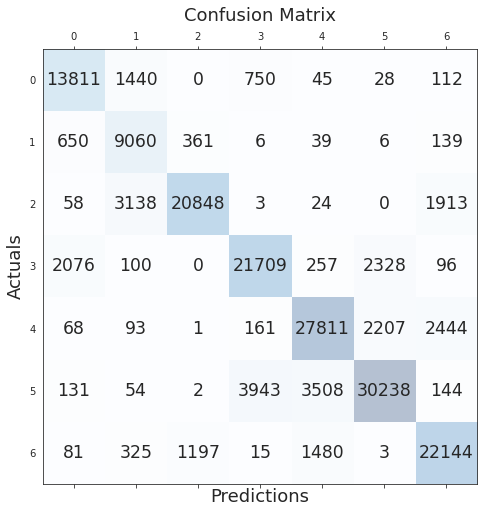

In [ ]:
confusion_matrix(test_df, final_rf_model_mus)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
final_rf_model_mus.save("/pyspark_models/classification_model")

In [ ]:
!tar -zcvf final_model.tar.gz /pyspark_models/classification_model

tar: Removing leading `/' from member names
/pyspark_models/classification_model/
/pyspark_models/classification_model/metadata/
/pyspark_models/classification_model/metadata/._SUCCESS.crc
/pyspark_models/classification_model/metadata/part-00000
/pyspark_models/classification_model/metadata/_SUCCESS
/pyspark_models/classification_model/metadata/.part-00000.crc
/pyspark_models/classification_model/stages/
/pyspark_models/classification_model/stages/1_StandardScaler_3833270e48cd/
/pyspark_models/classification_model/stages/1_StandardScaler_3833270e48cd/metadata/
/pyspark_models/classification_model/stages/1_StandardScaler_3833270e48cd/metadata/._SUCCESS.crc
/pyspark_models/classification_model/stages/1_StandardScaler_3833270e48cd/metadata/part-00000
/pyspark_models/classification_model/stages/1_StandardScaler_3833270e48cd/metadata/_SUCCESS
/pyspark_models/classification_model/stages/1_StandardScaler_3833270e48cd/metadata/.part-00000.crc
/pyspark_models/classification_model/stages/1_Stand

In [ ]:
!mv "final_model.tar.gz" "/content/drive/MyDrive/bdc-model/"

# Examples

### Importing the model

In [ ]:
!gdown --id 12rv8HDRvbqD4gvnxUHa9Qu_c_StB9CM5

Downloading...
From: https://drive.google.com/uc?id=12rv8HDRvbqD4gvnxUHa9Qu_c_StB9CM5
To: /content/final_model.tar.gz
15.2MB [00:00, 91.8MB/s]


In [ ]:
!mkdir /content/pyspark_final_model 

In [ ]:
!tar -xf /content/final_model.tar.gz -C /content/pyspark_final_model 

In [ ]:
# Load the model
from pyspark.ml.pipeline import PipelineModel

final_model = PipelineModel.load("pyspark_final_model/pyspark_models/classification_model")

### Usage example


The following code is a simple application which queries the audio features of a track from Spotify, and prints out the predicted genre according to the model.

Note: to get a valid auth token: https://developer.spotify.com/console/get-search-item
- Click on Get token
- Click on Request token (no additional scopes are necessary)
- Log in with a Spotify account
- Copy the new OAuth Token into the oauth_token variable


In [ ]:
oauth_token = "YOUR_OAUTH_TOKEN"

In [ ]:
genres_labels = ["metal/hardstyle", "experimental/progressive", "classic/piano/jazz", "rock/punk/indie", "Blues/soul", "hip hop/rap", "folk/songwriting"]

In [ ]:
def search_song(song, artist):

    import requests
    payload = {"Accept":"application/json", "Content-Type":"application/json", "Authorization": "Bearer " + oauth_token}
    response = requests.get(url='https://api.spotify.com/v1/search?q=track:' + song + '%20artist:' + artist + '&market=US&type=track&limit=2', 
                            headers=payload,
                            timeout=5) 
    data = response.json()

    results = []
    for res in data["tracks"]["items"]:
        results.append({         
            "track_id": res["id"],
            "track_name": res["name"],
            "artist_name": res["artists"][0]["name"],
            "album_name": res["album"]["name"],
            "release_date": res["album"]["release_date"]
        })

    return results


In [ ]:
def predict_genre(song_id, model, log=True):
    FEATURES = ["id", "duration_ms", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]
    if (log == True):
        print("### Requesting features ###")

    import requests
    payload = {"Accept":"application/json", "Content-Type":"application/json", "Authorization": "Bearer " + oauth_token}
    response = requests.get(url="https://api.spotify.com/v1/audio-features/" + song_id, 
                            headers=payload,
                            timeout=5) 
    data = response.json()
    if (log == True):
        print(response.text)
        print("\n### Creating dataframe ###")

    track_features_df = spark.read.json(sc.parallelize([data]))
    track_features_df = track_features_df.select(FEATURES)

    track_features_df = track_features_df.withColumn("label", lit("-1").cast("int"))

    predictions_df = model.transform(track_features_df)
    if (log == True):
        predictions_df.select("features", "prediction").show()
        print ( genres_labels[int(predictions_df.select("prediction").collect()[0]["prediction"])] )
    return  genres_labels[int(predictions_df.select("prediction").collect()[0]["prediction"])]

In [ ]:
import ipywidgets as widgets

search_results = search_song("shine on you", "pink floyd")

for i, result in enumerate(search_results):
    print ("Result {}: ID: {}, Track Name: {}, Artist: {}, Album {}, Release date: {}".format(i, result["track_id"], result["track_name"], result["artist_name"], result["album_name"], result["release_date"]))

buttons = widgets.RadioButtons(
            options=['{}: {} - {}'.format(res["track_id"], res["artist_name"], res["track_name"]) for i, res in enumerate(search_results)],
            layout={'width': 'max-content'})

print("\n")

widgets.Box([
        widgets.Label(value='Select a track:'),
        buttons])


Result 0: ID: 6pnwfWyaWjQiHCKTiZLItr, Track Name: Shine On You Crazy Diamond (Pts. 1-5), Artist: Pink Floyd, Album Wish You Were Here, Release date: 1975-09-12
Result 1: ID: 21j1PsCiTaO8ZW88UZrh3A, Track Name: Shine On You Crazy Diamond (Pts. 6-9), Artist: Pink Floyd, Album Wish You Were Here, Release date: 1975-09-12




Box(children=(Label(value='Select a track:'), RadioButtons(layout=Layout(width='max-content'), options=('6pnwf…

In [ ]:
if (buttons.value is not None):
    song_id = buttons.value[:22]
    predict_genre(song_id, final_model)

### Requesting features ###
{
  "danceability" : 0.266,
  "energy" : 0.294,
  "key" : 7,
  "loudness" : -11.938,
  "mode" : 0,
  "speechiness" : 0.0291,
  "acousticness" : 0.771,
  "instrumentalness" : 0.697,
  "liveness" : 0.107,
  "valence" : 0.0397,
  "tempo" : 137.941,
  "type" : "audio_features",
  "id" : "6pnwfWyaWjQiHCKTiZLItr",
  "uri" : "spotify:track:6pnwfWyaWjQiHCKTiZLItr",
  "track_href" : "https://api.spotify.com/v1/tracks/6pnwfWyaWjQiHCKTiZLItr",
  "analysis_url" : "https://api.spotify.com/v1/audio-analysis/6pnwfWyaWjQiHCKTiZLItr",
  "duration_ms" : 811077,
  "time_signature" : 3
}

### Creating dataframe ###
+--------------------+----------+
|            features|prediction|
+--------------------+----------+
|[137.941,0.771,0....|       1.0|
+--------------------+----------+

experimental, progressive


In [ ]:
### Automatic test
artists = ["Wolfgang Amadeus Mozart", "Eminem", "Iron Maiden", "Green Day", \
           "Fabrizio De André", "Louis Armstrong", "Pink Floyd", "The Dubliners", "BB King"]
tracks = ["Eine kleine Nachtmusik","Not Afraid", "Fear of The Dark", "Boulevard of Broken Dreams", \
          "Il Pescatore", "What a Wonderful World", "Shine on You Crazy Diamond", "The Foggy Dew", "Thrill is Gone"]

for (track, artist) in zip(tracks, artists): 
    search_results = search_song(track, artist)
    res = search_results[0]

    song_id = res["track_id"]
    print(artist + " - " + track + ": " + predict_genre(song_id, final_model, log=False) + "\n")


Wolfgang Amadeus Mozart - Eine kleine Nachtmusik: classic/piano/jazz

Eminem - Not Afraid: hip hop/rap

Iron Maiden - Fear of The Dark: metal/hardstyle

Green Day - Boulevard of Broken Dreams: rock/punk/indie

Fabrizio De André - Il Pescatore: folk/songwriting

Louis Armstrong - What a Wonderful World: classic/piano/jazz

Pink Floyd - Shine on You Crazy Diamond: experimental/progressive

The Dubliners - The Foggy Dew: folk/songwriting

BB King - Thrill is Gone: Blues/soul

